<a href="https://colab.research.google.com/github/Souro13/cautious-octo-umbrella/blob/main/Capstone_Fitbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FITBIT DATA ANALYSIS CAPSTONE PROJECT



#Project Layout

This capstone project aims to explore the broad spectrum of of personal health data obtained through wearable tech. Concentrating on a focused dataset from Amazon Mechanical Turk, spanning a month wide duration of March 12th till May 12th, this has been contrributed by 30 FitBit users, where the dataset meticulously examines minute-level details of physical activity, heart rate, and sleep patterns. Identified uniquely by export session ID and timestamp, the data enables a detailed and personalized analysis. The variations in data output stem from the utilization of different Fitbit trackers and individual tracking behaviors. Comprising 18 distinct files that capture various health metrics, the aim of this project is to derive meaningful insights into physical activity patterns, caloric expenditure, and sleep quality. In doing so, it aims to illuminate the intricate relationship between personal health monitoring and wearable technology to govern fitness.

#Objectives And scopes
The main objectives of this project are:

1. Evaluate Physical Activity Trends: Analyze minute-level data to identify
patterns and trends in participants' physical activity levels over the survey period.

2. Assess Sleep Quality Metrics: Explore sleep monitoring data to assess the quality and duration of participants' sleep, providing insights into overall sleep patterns.

3. Compare Tracker Performance: Evaluate the performance of different Fitbit trackers used by participants and assess how they contribute to variations in recorded health metrics.

4. User Behavior Analysis: Investigate diverse tracking behaviors and preferences exhibited by participants, offering a deeper understanding of individual approaches to health monitoring.

The Scope of this analysis are:

1. Individualized Exploration: Utilize export session ID and timestamp for individualized analysis, allowing for a personalized understanding of each participant's health data.

2. Comparative Assessment: Compare and contrast data across different Fitbit trackers to identify potential strengths and limitations of each device.

3. Health Metric Correlations: Explore potential correlations between physical activity, heart rate, and sleep metrics to gain insights into the holistic impact on participants' health.

4. Behavioral Patterns: Investigate user behaviors and preferences, such as adherence to tracking routines and response to varying tracker functionalities.

# Undergoing Exploratory Data Analysis

Now, we import the libraries one by one, and make changes as we proceed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, we impport the datasets one by one, and check them out in the process.

In [ ]:
#daily_Activity
df_daily_Activity = pd.read_csv('/content/dailyActivity_merged.csv')
df_daily_Activity.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

In [ ]:
#As we can see, there are some columns that are conjusting the space and canbe removed. Hence we proceed with that.
columns_to_drop = ['LoggedActivitiesDistance', 'SedentaryActiveDistance', 'ModeratelyActiveDistance', 'TrackerDistance']

# Dropping the columns
daily_activity_filtered = df_daily_Activity.drop(columns=columns_to_drop)
daily_activity = pd.DataFrame(daily_activity_filtered)
# Rename the 'ActivityDate' column to 'ActivityDay' for equalising it with other datasets
daily_activity = daily_activity.rename(columns={'ActivityDate': 'ActivityDay'})
# Display the resulting dataset
print(daily_activity)

             Id ActivityDay  TotalSteps  TotalDistance  VeryActiveDistance  \
0    1503960366   4/12/2016       13162       8.500000                1.88   
1    1503960366   4/13/2016       10735       6.970000                1.57   
2    1503960366   4/14/2016       10460       6.740000                2.44   
3    1503960366   4/15/2016        9762       6.280000                2.14   
4    1503960366   4/16/2016       12669       8.160000                2.71   
..          ...         ...         ...            ...                 ...   
935  8877689391    5/8/2016       10686       8.110000                1.08   
936  8877689391    5/9/2016       20226      18.250000               11.10   
937  8877689391   5/10/2016       10733       8.150000                1.35   
938  8877689391   5/11/2016       21420      19.559999               13.22   
939  8877689391   5/12/2016        8064       6.120000                1.82   

     LightActiveDistance  VeryActiveMinutes  FairlyActiveMinute

In [ ]:
#daily_intensities
daily_intensities = pd.read_csv('/content/dailyCalories_merged.csv')
daily_intensities.head()

Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863

In [ ]:
#daily_steps
daily_steps = pd.read_csv('/content/dailySteps_merged.csv')
daily_steps.head()

Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669

In [ ]:
#daily_calories
daily_calories = pd.read_csv('/content/dailyCalories_merged.csv')
daily_calories.head()

Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863

Our main aim is to have a dataset that covers all of  the parameters we are working on to make and deliver suggestions, so we merge the above data's

In [ ]:
# Merge daily_activity and daily_Calories
merged_daily_data = pd.merge(daily_activity, daily_calories, on=['Id','ActivityDay'])

# Merge with daily_intensities
merged_daily_data = pd.merge(merged_daily_data, daily_intensities, on=['Id','ActivityDay'])

# Merge with daily_steps
merged_daily_data = pd.merge(merged_daily_data, daily_steps, on=['Id','ActivityDay'])

# Display the resulting dataset
print(merged_daily_data)


             Id ActivityDay  TotalSteps  TotalDistance  VeryActiveDistance  \
0    1503960366   4/12/2016       13162       8.500000                1.88   
1    1503960366   4/13/2016       10735       6.970000                1.57   
2    1503960366   4/14/2016       10460       6.740000                2.44   
3    1503960366   4/15/2016        9762       6.280000                2.14   
4    1503960366   4/16/2016       12669       8.160000                2.71   
..          ...         ...         ...            ...                 ...   
935  8877689391    5/8/2016       10686       8.110000                1.08   
936  8877689391    5/9/2016       20226      18.250000               11.10   
937  8877689391   5/10/2016       10733       8.150000                1.35   
938  8877689391   5/11/2016       21420      19.559999               13.22   
939  8877689391   5/12/2016        8064       6.120000                1.82   

     LightActiveDistance  VeryActiveMinutes  FairlyActiveMinute

In [ ]:
merged_daily_data.head()

Id ActivityDay  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366   4/12/2016       13162           8.50                1.88   
1  1503960366   4/13/2016       10735           6.97                1.57   
2  1503960366   4/14/2016       10460           6.74                2.44   
3  1503960366   4/15/2016        9762           6.28                2.14   
4  1503960366   4/16/2016       12669           8.16                2.71   

   LightActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                 6.06                 25                   13   
1                 4.71                 21                   19   
2                 3.91                 30                   11   
3                 2.83                 29                   34   
4                 5.04                 36                   10   

   LightlyActiveMinutes  SedentaryMinutes  Calories_x  Calories_y  Calories  \
0                   328               728        1985        1985      1985   
1                   217               776        1797        1797      1797   
2                   181              1218        1776        1776      1776   
3                   209               726        1745        1745      1745   
4                   221               773        1863        1863      1863   

   StepTotal  
0      13162  
1      10735  
2      10460  
3       9762  
4      12669

Here, we have two unwanted columns, Calories_x and Calories_y. We remove them respectfully.

In [ ]:
columns_to_drop = ['Calories_x', 'Calories_y', 'StepTotal']

# Drop the specified columns
merged_daily_data = merged_daily_data.drop(columns=columns_to_drop)
merged_daily = pd.DataFrame(merged_daily_data)

In [ ]:
merged_daily.head()

Id ActivityDay  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366   4/12/2016       13162           8.50                1.88   
1  1503960366   4/13/2016       10735           6.97                1.57   
2  1503960366   4/14/2016       10460           6.74                2.44   
3  1503960366   4/15/2016        9762           6.28                2.14   
4  1503960366   4/16/2016       12669           8.16                2.71   

   LightActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                 6.06                 25                   13   
1                 4.71                 21                   19   
2                 3.91                 30                   11   
3                 2.83                 29                   34   
4                 5.04                 36                   10   

   LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   328               728      1985  
1                   217               776      1797  
2                   181              1218      1776  
3                   209               726      1745  
4                   221               773      1863

#Hour data

In [ ]:
hourly_steps = pd.read_csv('/content/hourlySteps_merged.csv')
hourly_steps.head()

Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0

In [ ]:
hourly_Calories = pd.read_csv('/content/hourlyCalories_merged.csv')
hourly_Calories.head()

Id           ActivityHour  Calories
0  1503960366  4/12/2016 12:00:00 AM        81
1  1503960366   4/12/2016 1:00:00 AM        61
2  1503960366   4/12/2016 2:00:00 AM        59
3  1503960366   4/12/2016 3:00:00 AM        47
4  1503960366   4/12/2016 4:00:00 AM        48

In [ ]:
hourly_Intestities = pd.read_csv('/content/hourlyIntensities_merged.csv')
hourly_Intestities.head()

Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
4  1503960366   4/12/2016 4:00:00 AM               0          0.000000

In [ ]:
#Merging the hourly data's
merged_hourly_data = pd.merge(hourly_Calories, hourly_Intestities, on=['Id', 'ActivityHour'], how='outer')

# Merge with hourly steps
merged_hourly_data = pd.merge(merged_hourly_data,hourly_steps, on=['Id', 'ActivityHour'], how='outer')

# Display the merged data
print(merged_hourly_data)

               Id           ActivityHour  Calories  TotalIntensity  \
0      1503960366  4/12/2016 12:00:00 AM        81              20   
1      1503960366   4/12/2016 1:00:00 AM        61               8   
2      1503960366   4/12/2016 2:00:00 AM        59               7   
3      1503960366   4/12/2016 3:00:00 AM        47               0   
4      1503960366   4/12/2016 4:00:00 AM        48               0   
...           ...                    ...       ...             ...   
22094  8877689391  5/12/2016 10:00:00 AM       126              12   
22095  8877689391  5/12/2016 11:00:00 AM       192              29   
22096  8877689391  5/12/2016 12:00:00 PM       321              93   
22097  8877689391   5/12/2016 1:00:00 PM       101               6   
22098  8877689391   5/12/2016 2:00:00 PM       113               9   

       AverageIntensity  StepTotal  
0              0.333333        373  
1              0.133333        160  
2              0.116667        151  
3          

Importing Sleep Dataset

In [ ]:
sleepday_merged = pd.read_csv('/content/sleepDay_merged.csv')
sleepday_merged

Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             360  
409             527  
410             423  
411             545  
412             463  

[413 rows x 5 columns]

Minutes Workshop

In [ ]:
#minutes wide
minute_Calories_wide = pd.read_csv('/content/minuteCaloriesWide_merged.csv')
minute_Calories_wide.head()

Id           ActivityHour  Calories00  Calories01  Calories02  \
0  1503960366  4/13/2016 12:00:00 AM      1.8876      2.2022      0.9438   
1  1503960366   4/13/2016 1:00:00 AM      0.7865      0.7865      0.7865   
2  1503960366   4/13/2016 2:00:00 AM      0.7865      0.7865      0.7865   
3  1503960366   4/13/2016 3:00:00 AM      0.7865      0.7865      0.7865   
4  1503960366   4/13/2016 4:00:00 AM      0.7865      0.7865      0.7865   

   Calories03  Calories04  Calories05  Calories06  Calories07  ...  \
0      0.9438      0.9438      2.0449      0.9438      2.2022  ...   
1      0.7865      0.9438      0.9438      0.9438      0.7865  ...   
2      0.7865      0.7865      0.7865      0.7865      0.7865  ...   
3      0.7865      0.7865      0.7865      0.7865      0.7865  ...   
4      0.7865      0.7865      0.7865      0.7865      0.7865  ...   

   Calories50  Calories51  Calories52  Calories53  Calories54  Calories55  \
0      0.9438      2.0449      2.0449      0.9438      2.3595      1.8876   
1      0.7865      0.7865      0.7865      0.7865      0.7865      0.7865   
2      0.7865      0.7865      0.7865      0.7865      0.7865      0.7865   
3      0.7865      0.7865      0.7865      0.7865      0.7865      0.7865   
4      0.7865      0.7865      0.7865      0.7865      0.7865      0.7865   

   Calories56  Calories57  Calories58  Calories59  
0      0.9438      0.9438      0.9438      0.9438  
1      0.7865      0.7865      0.7865      0.7865  
2      0.7865      0.7865      0.7865      0.7865  
3      0.7865      0.7865      0.7865      0.7865  
4      0.7865      0.7865      0.7865      0.7865  

[5 rows x 62 columns]

In [ ]:
#minutes calories narrow
minute_Calories_narrow = pd.read_csv('/content/minuteCaloriesNarrow_merged.csv')
print(minute_Calories_narrow)

               Id         ActivityMinute  Calories
0      1503960366  4/12/2016 12:00:00 AM   0.78650
1      1503960366  4/12/2016 12:01:00 AM   0.78650
2      1503960366  4/12/2016 12:02:00 AM   0.78650
3      1503960366  4/12/2016 12:03:00 AM   0.78650
4      1503960366  4/12/2016 12:04:00 AM   0.78650
...           ...                    ...       ...
41753  1503960366  5/10/2016 11:53:00 PM   0.93768
41754  1503960366  5/10/2016 11:54:00 PM   0.78140
41755  1503960366  5/10/2016 11:55:00 PM   0.93768
41756  1503960366  5/10/2016 11:56:00 PM   0.78140
41757  1503960366                    NaN       NaN

[41758 rows x 3 columns]


In [ ]:
#minutes intensities narrow
minute_Intestities_narrow = pd.read_csv('/content/minuteIntensitiesNarrow_merged.csv')
print(minute_Intestities_narrow.head() )

           Id         ActivityMinute  Intensity
0  1503960366  4/12/2016 12:00:00 AM          0
1  1503960366  4/12/2016 12:01:00 AM          0
2  1503960366  4/12/2016 12:02:00 AM          0
3  1503960366  4/12/2016 12:03:00 AM          0
4  1503960366  4/12/2016 12:04:00 AM          0


Merging these datasets together

In [ ]:
# Merge datasets based on 'Id' and 'ActivityMinute'
merged_minute_data = pd.merge(minute_Calories_narrow,minute_Intestities_narrow, on=['Id', 'ActivityMinute'], how='outer')

# Display the merged DataFrame
print(merged_minute_data)

               Id         ActivityMinute  Calories  Intensity
0      1503960366  4/12/2016 12:00:00 AM    0.7865        0.0
1      1503960366  4/12/2016 12:01:00 AM    0.7865        0.0
2      1503960366  4/12/2016 12:02:00 AM    0.7865        0.0
3      1503960366  4/12/2016 12:03:00 AM    0.7865        0.0
4      1503960366  4/12/2016 12:04:00 AM    0.7865        0.0
...           ...                    ...       ...        ...
59859  1624580081   4/23/2016 4:38:00 PM       NaN        0.0
59860  1624580081   4/23/2016 4:39:00 PM       NaN        0.0
59861  1624580081   4/23/2016 4:40:00 PM       NaN        1.0
59862  1624580081   4/23/2016 4:41:00 PM       NaN        1.0
59863  1624580081   4/23/2016 4:42:00 PM       NaN        1.0

[59864 rows x 4 columns]


In [ ]:
merged_minute_data.head()

Id         ActivityMinute  Calories  Intensity
0  1503960366  4/12/2016 12:00:00 AM    0.7865        0.0
1  1503960366  4/12/2016 12:01:00 AM    0.7865        0.0
2  1503960366  4/12/2016 12:02:00 AM    0.7865        0.0
3  1503960366  4/12/2016 12:03:00 AM    0.7865        0.0
4  1503960366  4/12/2016 12:04:00 AM    0.7865        0.0

Checking for missing values

In [ ]:
print(merged_hourly_data)

               Id           ActivityHour  Calories  TotalIntensity  \
0      1503960366  4/12/2016 12:00:00 AM        81              20   
1      1503960366   4/12/2016 1:00:00 AM        61               8   
2      1503960366   4/12/2016 2:00:00 AM        59               7   
3      1503960366   4/12/2016 3:00:00 AM        47               0   
4      1503960366   4/12/2016 4:00:00 AM        48               0   
...           ...                    ...       ...             ...   
22094  8877689391  5/12/2016 10:00:00 AM       126              12   
22095  8877689391  5/12/2016 11:00:00 AM       192              29   
22096  8877689391  5/12/2016 12:00:00 PM       321              93   
22097  8877689391   5/12/2016 1:00:00 PM       101               6   
22098  8877689391   5/12/2016 2:00:00 PM       113               9   

       AverageIntensity  StepTotal  
0              0.333333        373  
1              0.133333        160  
2              0.116667        151  
3          

In [ ]:
# Display the count of null values for each column
null_values = merged_hourly_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Id                  0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64


In [ ]:
print(merged_minute_data)

               Id         ActivityMinute  Calories  Intensity
0      1503960366  4/12/2016 12:00:00 AM    0.7865        0.0
1      1503960366  4/12/2016 12:01:00 AM    0.7865        0.0
2      1503960366  4/12/2016 12:02:00 AM    0.7865        0.0
3      1503960366  4/12/2016 12:03:00 AM    0.7865        0.0
4      1503960366  4/12/2016 12:04:00 AM    0.7865        0.0
...           ...                    ...       ...        ...
59859  1624580081   4/23/2016 4:38:00 PM       NaN        0.0
59860  1624580081   4/23/2016 4:39:00 PM       NaN        0.0
59861  1624580081   4/23/2016 4:40:00 PM       NaN        1.0
59862  1624580081   4/23/2016 4:41:00 PM       NaN        1.0
59863  1624580081   4/23/2016 4:42:00 PM       NaN        1.0

[59864 rows x 4 columns]


In [ ]:
# Displaying the count of null values for each column
null_values = merged_minute_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Id                    0
ActivityMinute        1
Calories          18107
Intensity             1
dtype: int64


In [ ]:
print(type(merged_minute_data))

<class 'method'>


In [ ]:
null_values = merged_minute_data.isnull().sum()

In [ ]:
null_values = pd.isnull(merged_minute_data).sum()

In [ ]:
print("Null values in each column:")
print(null_values)

In [ ]:
merged_minute_data['Calories'] = merged_minute_data['Calories'].fillna(merged_minute_data['Calories'].mean())

print(merged_minute_data)

               Id      ActivityMinute  Calories  Intensity  Hour
0      1503960366 2016-04-12 00:00:00  0.786500        0.0     0
1      1503960366 2016-04-12 00:01:00  0.786500        0.0     0
2      1503960366 2016-04-12 00:02:00  0.786500        0.0     0
3      1503960366 2016-04-12 00:03:00  0.786500        0.0     0
4      1503960366 2016-04-12 00:04:00  0.786500        0.0     0
...           ...                 ...       ...        ...   ...
59859  1624580081 2016-04-23 16:38:00  1.306707        0.0    16
59860  1624580081 2016-04-23 16:39:00  1.306707        0.0    16
59861  1624580081 2016-04-23 16:40:00  1.306707        1.0    16
59862  1624580081 2016-04-23 16:41:00  1.306707        1.0    16
59863  1624580081 2016-04-23 16:42:00  1.306707        1.0    16

[59863 rows x 5 columns]


In [ ]:
# Check for null values in each column in sleepday_merge
null_values = sleepday_merged.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [ ]:
# Display the count of null values for each column
null_values = merged_daily_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Id                      0
ActivityDay             0
TotalSteps              0
TotalDistance           0
VeryActiveDistance      0
LightActiveDistance     0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
dtype: int64


#Visualisation of the summed data

Steps per day

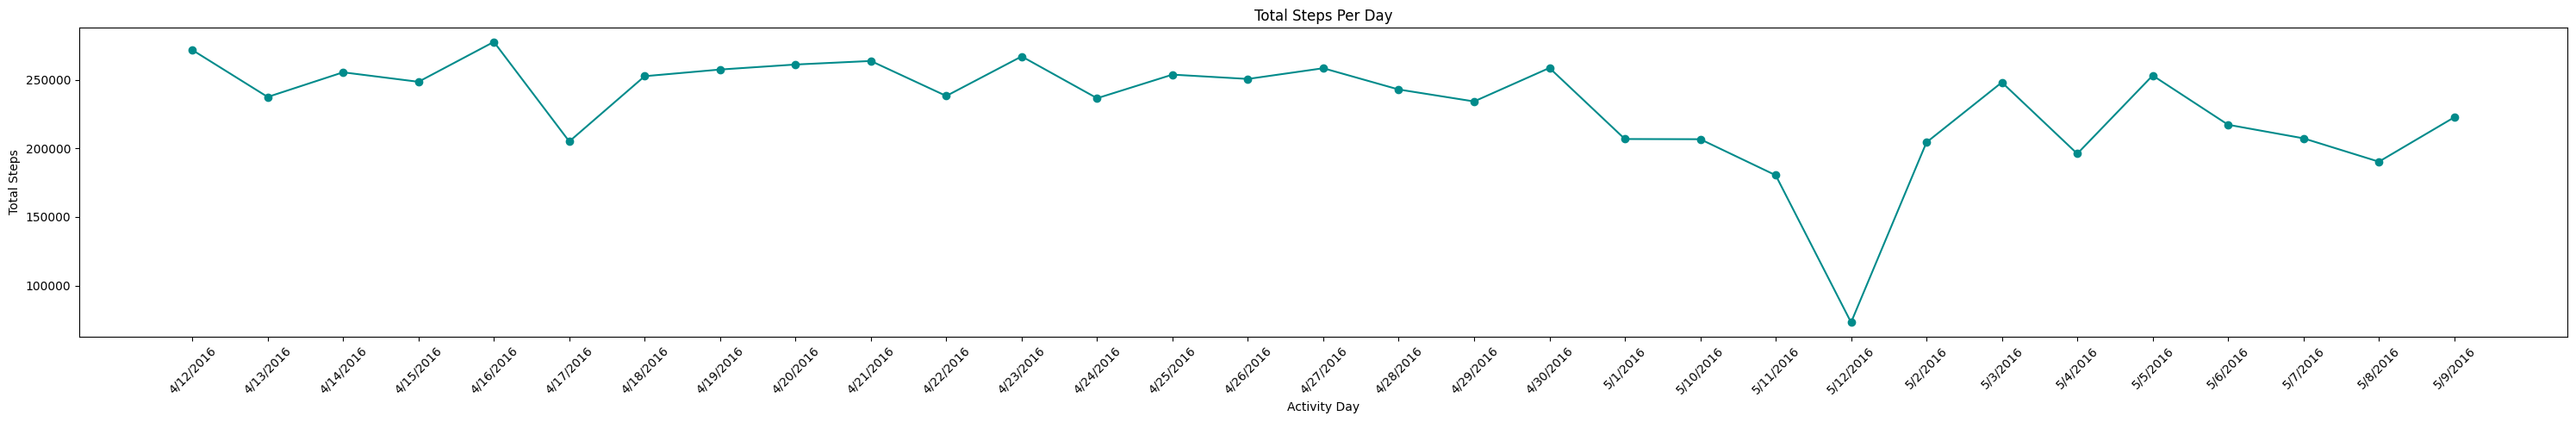

In [ ]:
# Total Steps Per Day

# Group by ActivityDay and calculate the total steps per day
steps_per_day = merged_daily_data.groupby('ActivityDay')['TotalSteps'].sum()

# Plotting the line chart for steps per day
plt.figure(figsize=(30, 5))
plt.plot(steps_per_day.index, steps_per_day.values, marker='o', linestyle='-', color='darkcyan')
plt.title('Total Steps Per Day')
plt.xlabel('Activity Day')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total steps of each user

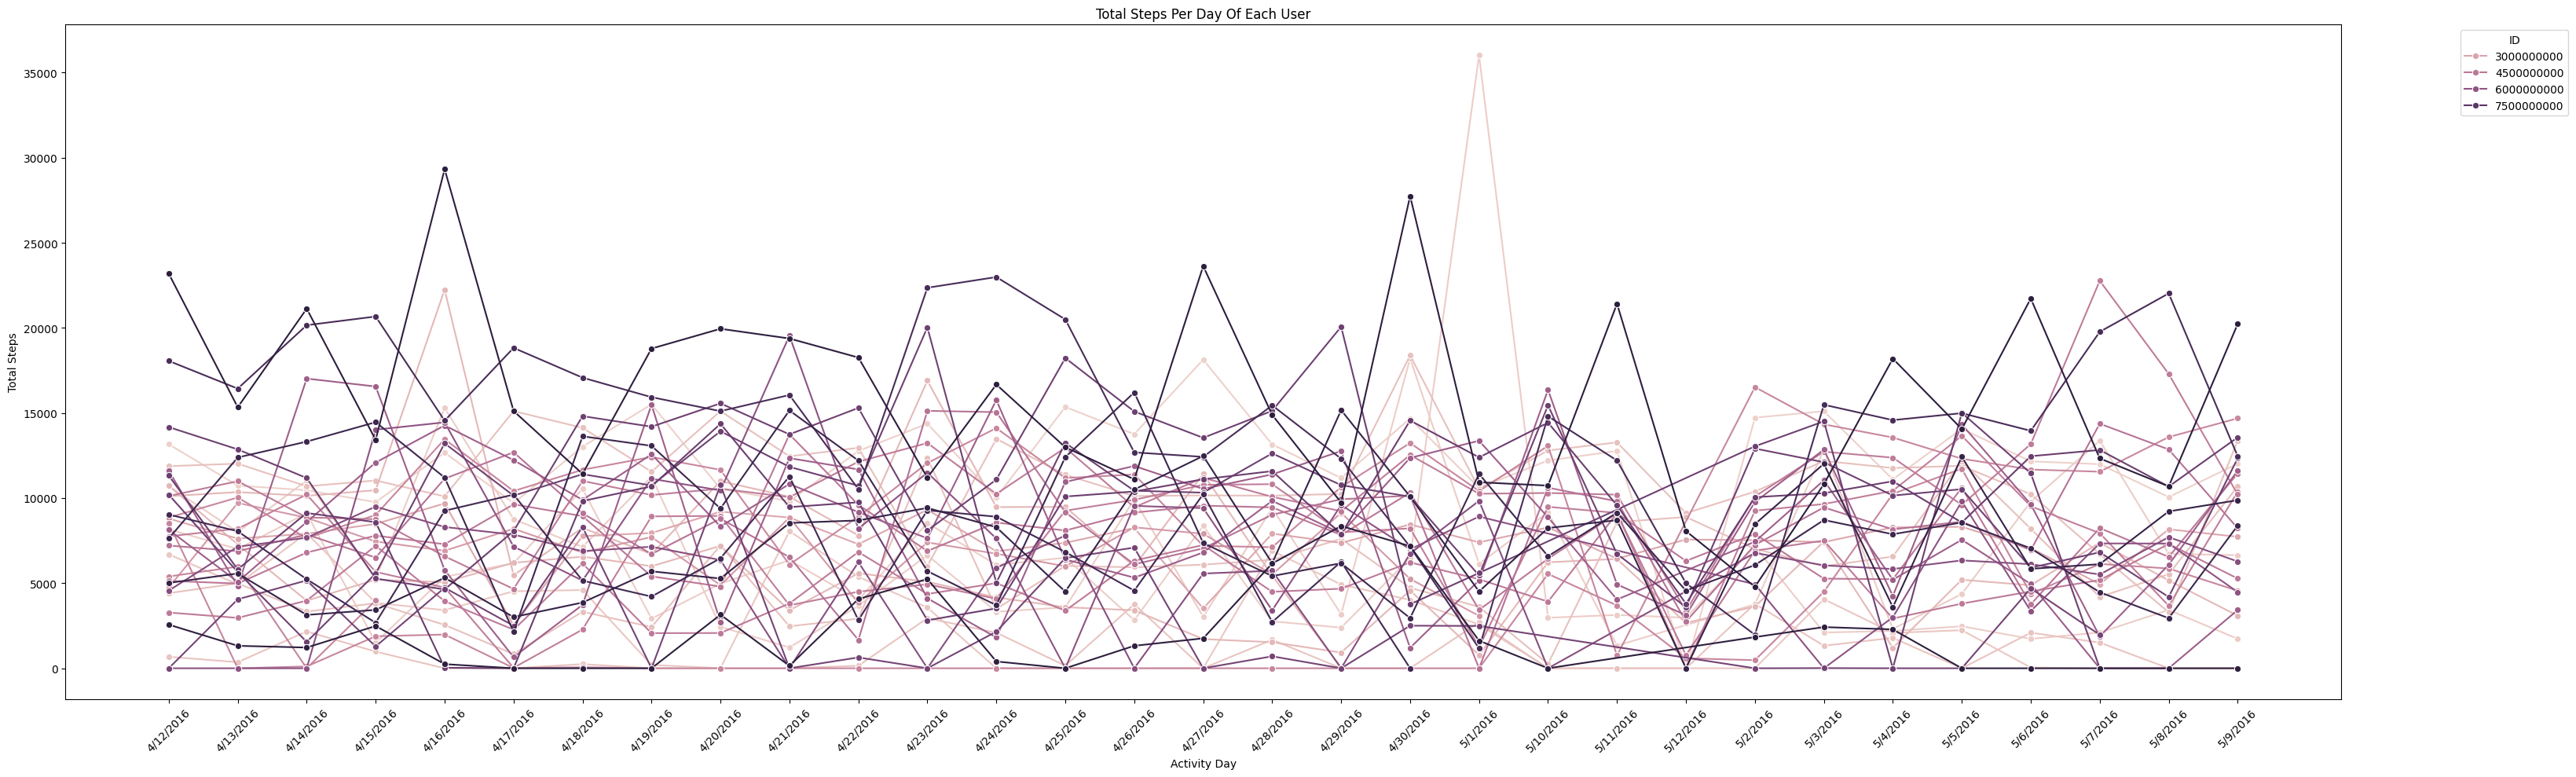

In [ ]:
# Total Steps of Each User

# Group by ID and ActivityDay and calculate the total steps per day
steps_per_day_id = merged_daily_data.groupby(['Id', 'ActivityDay'])['TotalSteps'].sum().reset_index()

# Plotting total steps per day for each user
plt.figure(figsize=(30, 10))
sns.lineplot(x='ActivityDay', y='TotalSteps', hue='Id', data=steps_per_day_id, marker='o')
plt.title('Total Steps Per Day Of Each User')
plt.xlabel('Activity Day')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Calcuating the highest and lowest steps per day

In [ ]:
#Highest mean anad standarad deviation
mean_steps = merged_daily_data['TotalSteps'].mean()
std_steps = merged_daily_data['TotalSteps'].std()

# Define thresholds (as 1.5 standard deviations from the mean)
threshold_high = mean_steps + 1.5 * std_steps
threshold_low = mean_steps - 1.5 * std_steps

# Identify days with exceptionally high or low TotalSteps
high_activity_days = merged_daily_data[merged_daily_data['TotalSteps'] > threshold_high]
low_activity_days = merged_daily_data[merged_daily_data['TotalSteps'] < threshold_low]

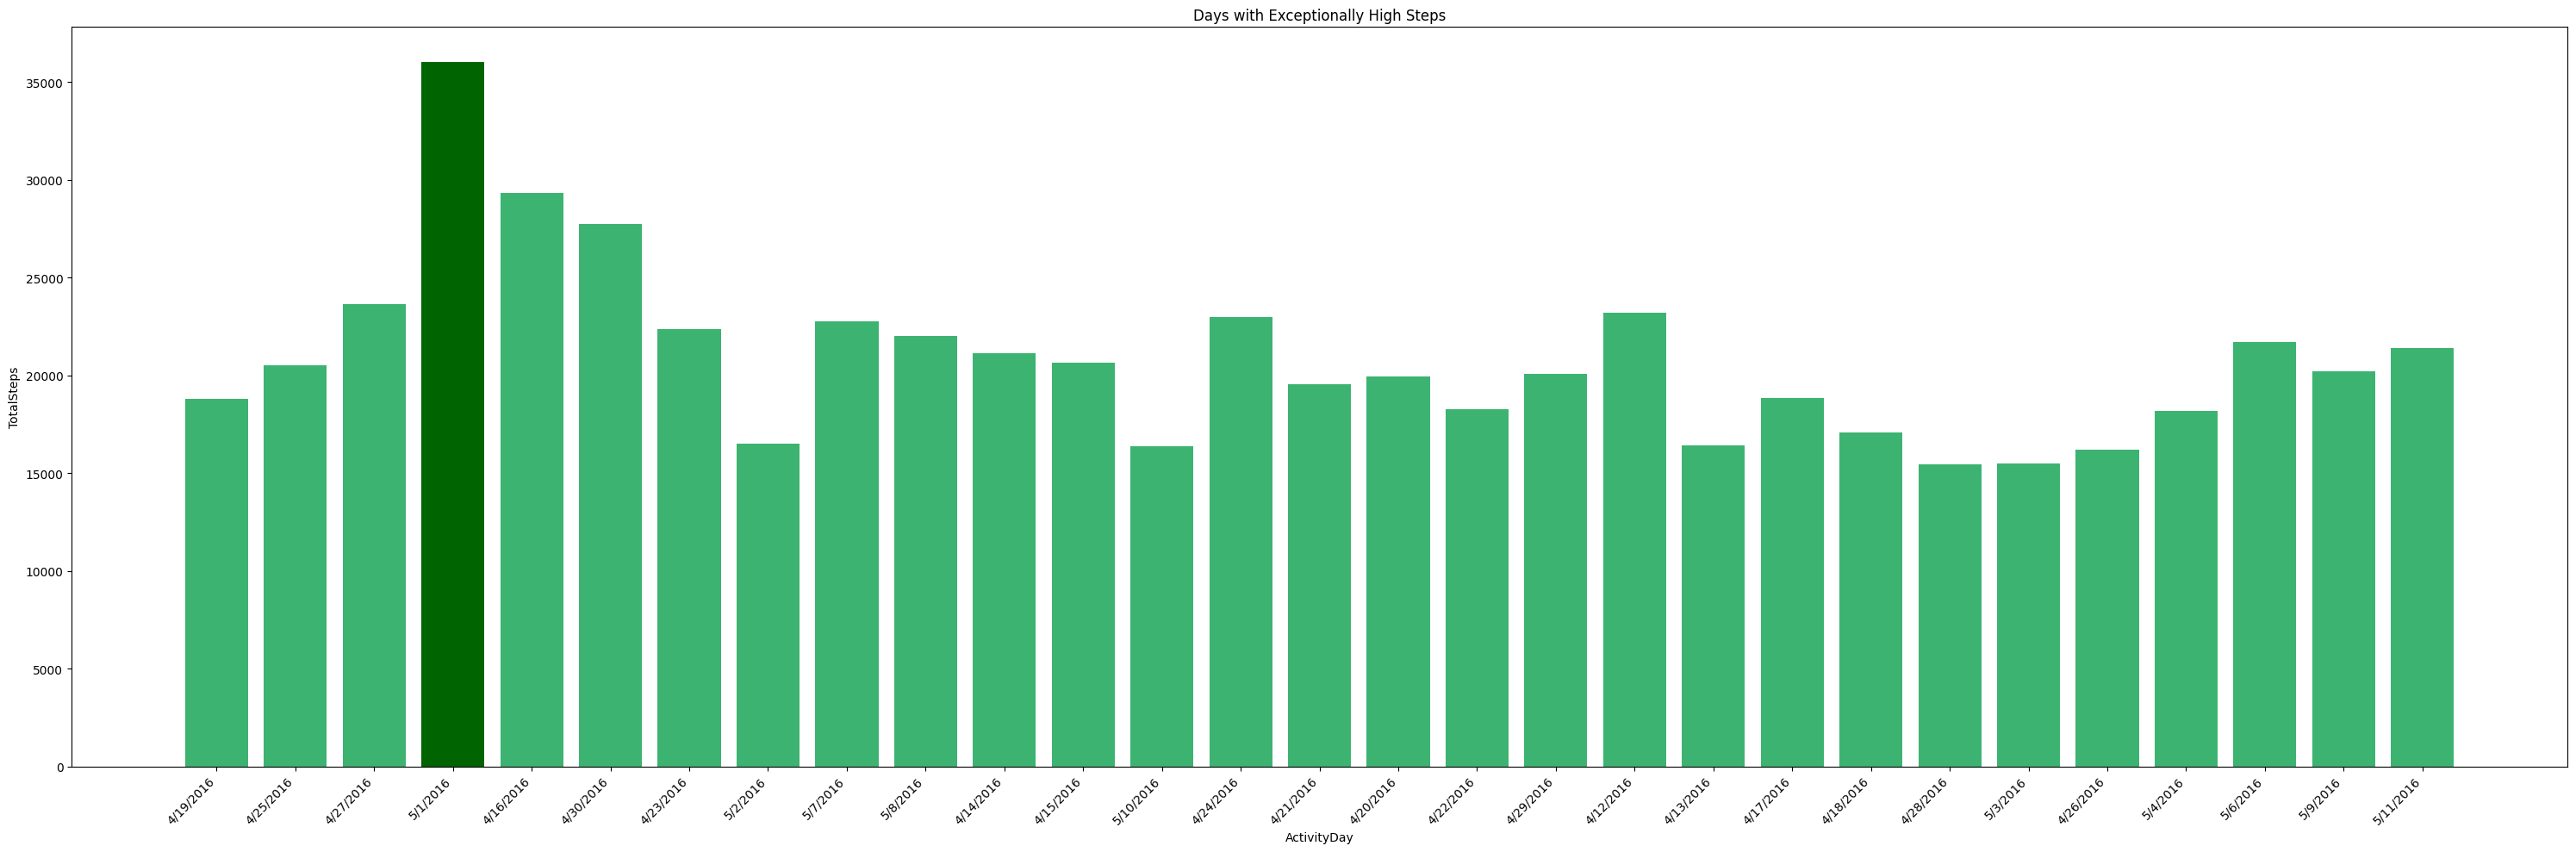

In [ ]:
# Find the day with the highest total steps
max_steps_day = high_activity_days.loc[high_activity_days['TotalSteps'].idxmax()]
# Plotting the bar chart for High Steps
plt.figure(figsize=(30, 10))
plt.bar(high_activity_days['ActivityDay'], high_activity_days['TotalSteps'], color='mediumseagreen')
plt.bar(max_steps_day['ActivityDay'], max_steps_day['TotalSteps'], color='darkgreen', label='Highest Steps')
plt.title('Days with Exceptionally High Steps')
plt.xlabel('ActivityDay')
plt.ylabel('TotalSteps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

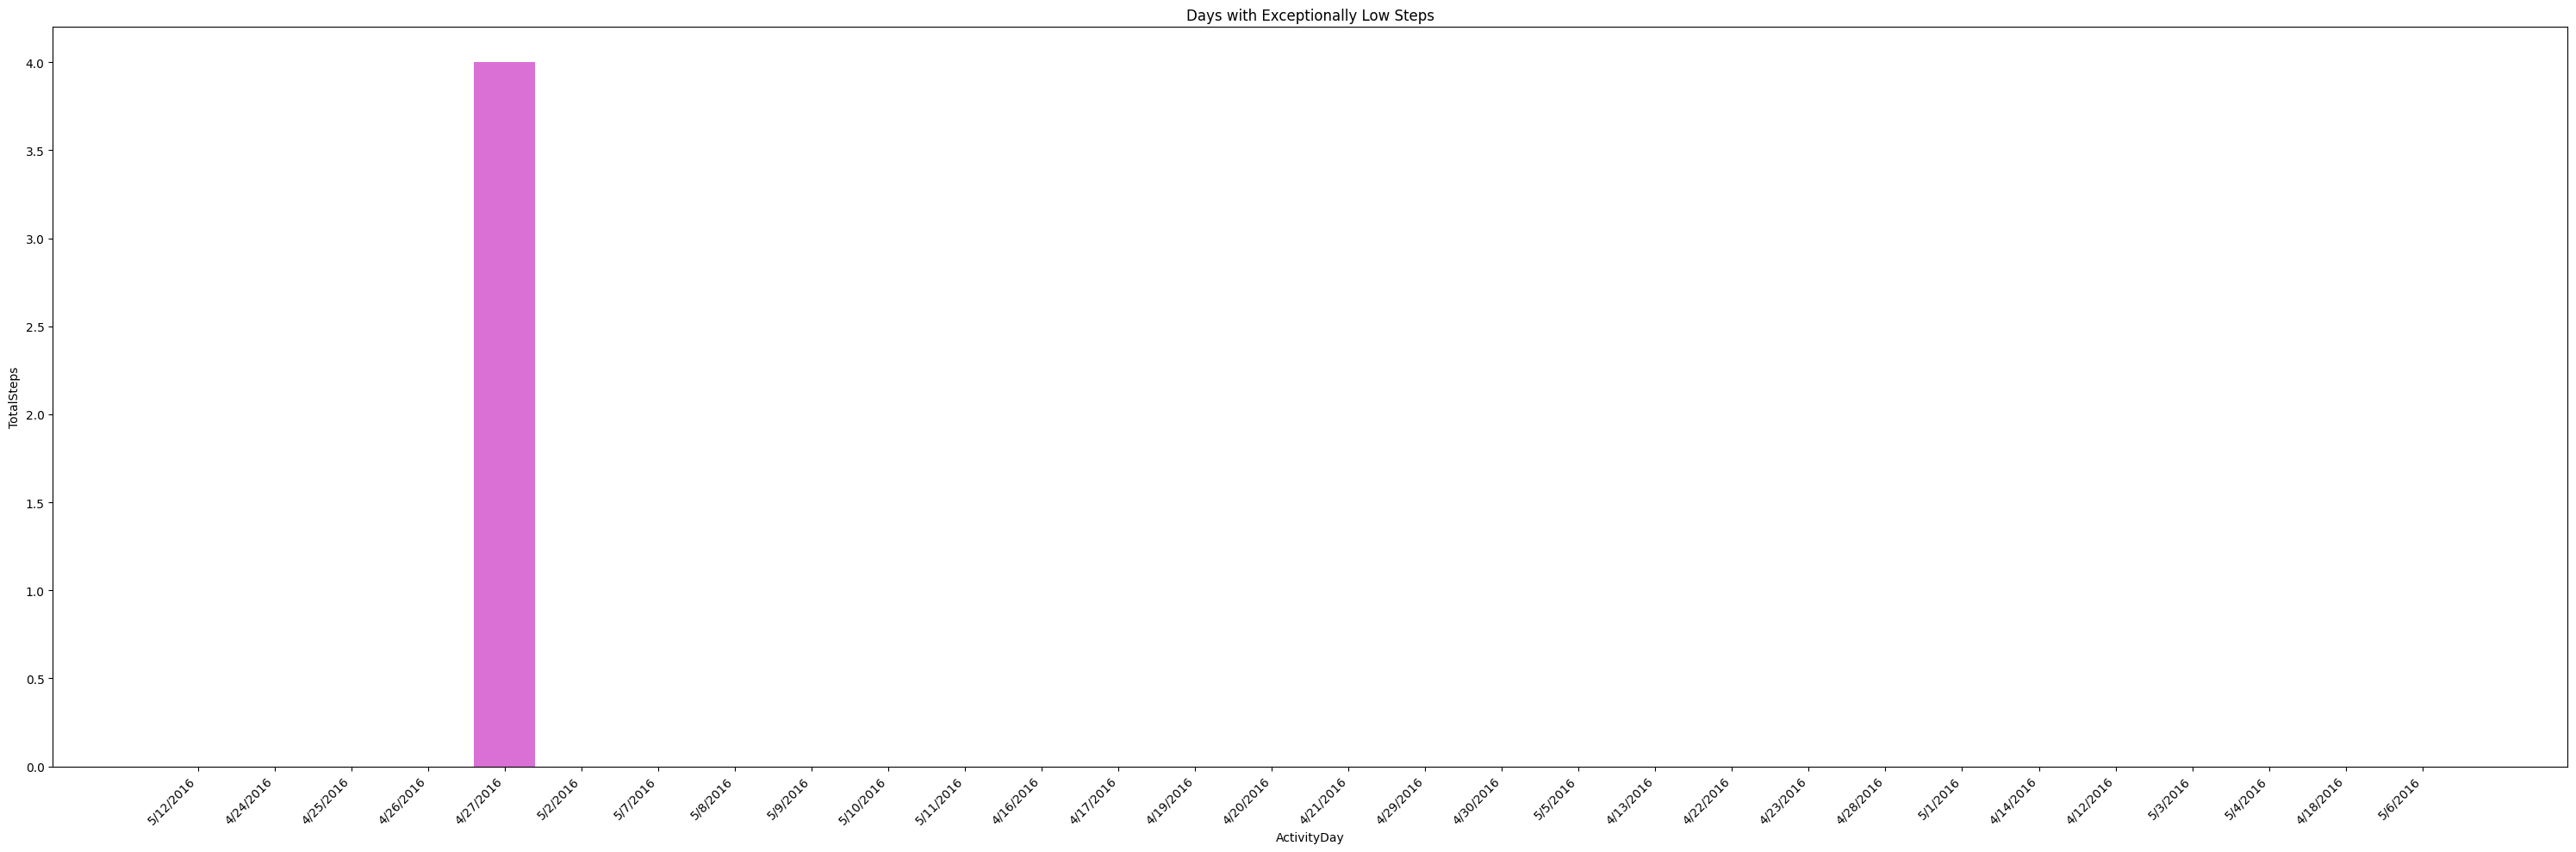

In [ ]:
# Find the day with the lowest total steps
min_steps_day = low_activity_days.loc[low_activity_days['TotalSteps'].idxmin()]
# Plotting the bar chart
plt.figure(figsize=(30, 10))
plt.bar(low_activity_days['ActivityDay'], low_activity_days['TotalSteps'], color='orchid')
plt.bar(min_steps_day['ActivityDay'], min_steps_day['TotalSteps'], color='blue', label='Lowest Steps')
plt.title('Days with Exceptionally Low Steps')
plt.xlabel('ActivityDay')
plt.ylabel('TotalSteps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Calories per day

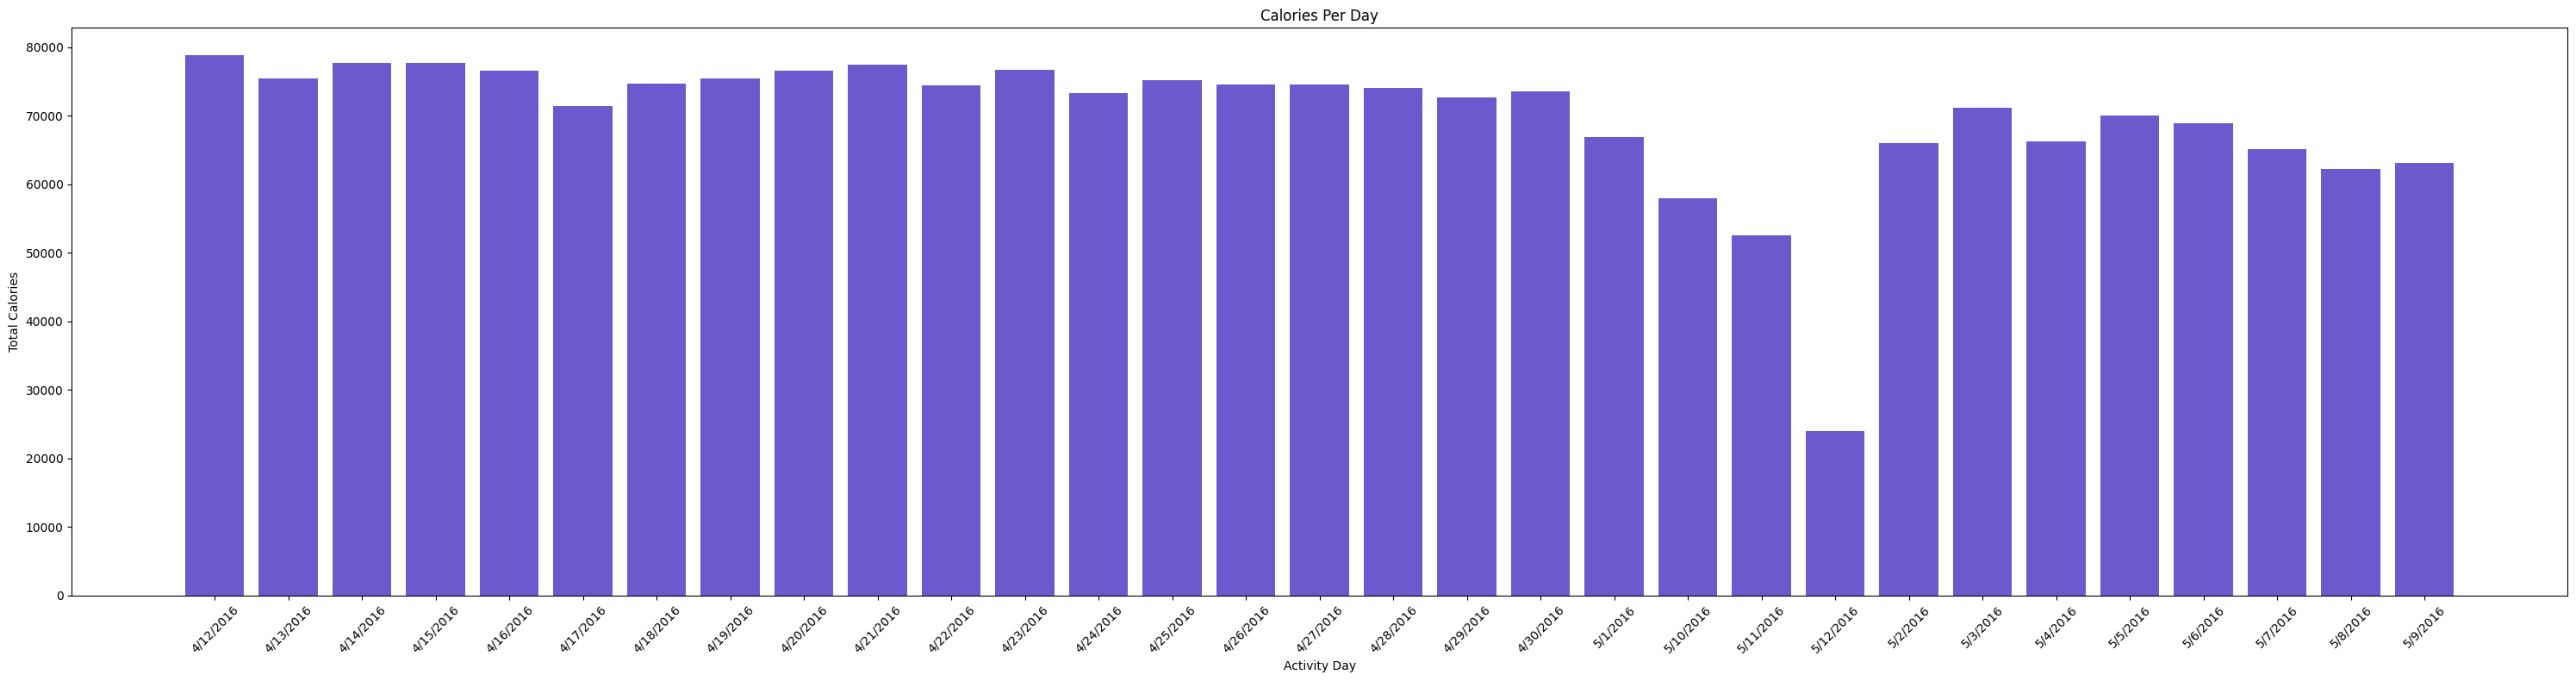

In [ ]:
# Group by 'ActivityDay' and calculate the total calories per day
calories_per_day = merged_daily_data.groupby('ActivityDay')['Calories'].sum().reset_index()
# Plotting the line chart for calories per day
plt.figure(figsize=(30, 8))
plt.bar(calories_per_day['ActivityDay'], calories_per_day['Calories'], color='slateblue')
plt.title('Calories Per Day')
plt.xlabel('Activity Day')
plt.ylabel('Total Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distance per day

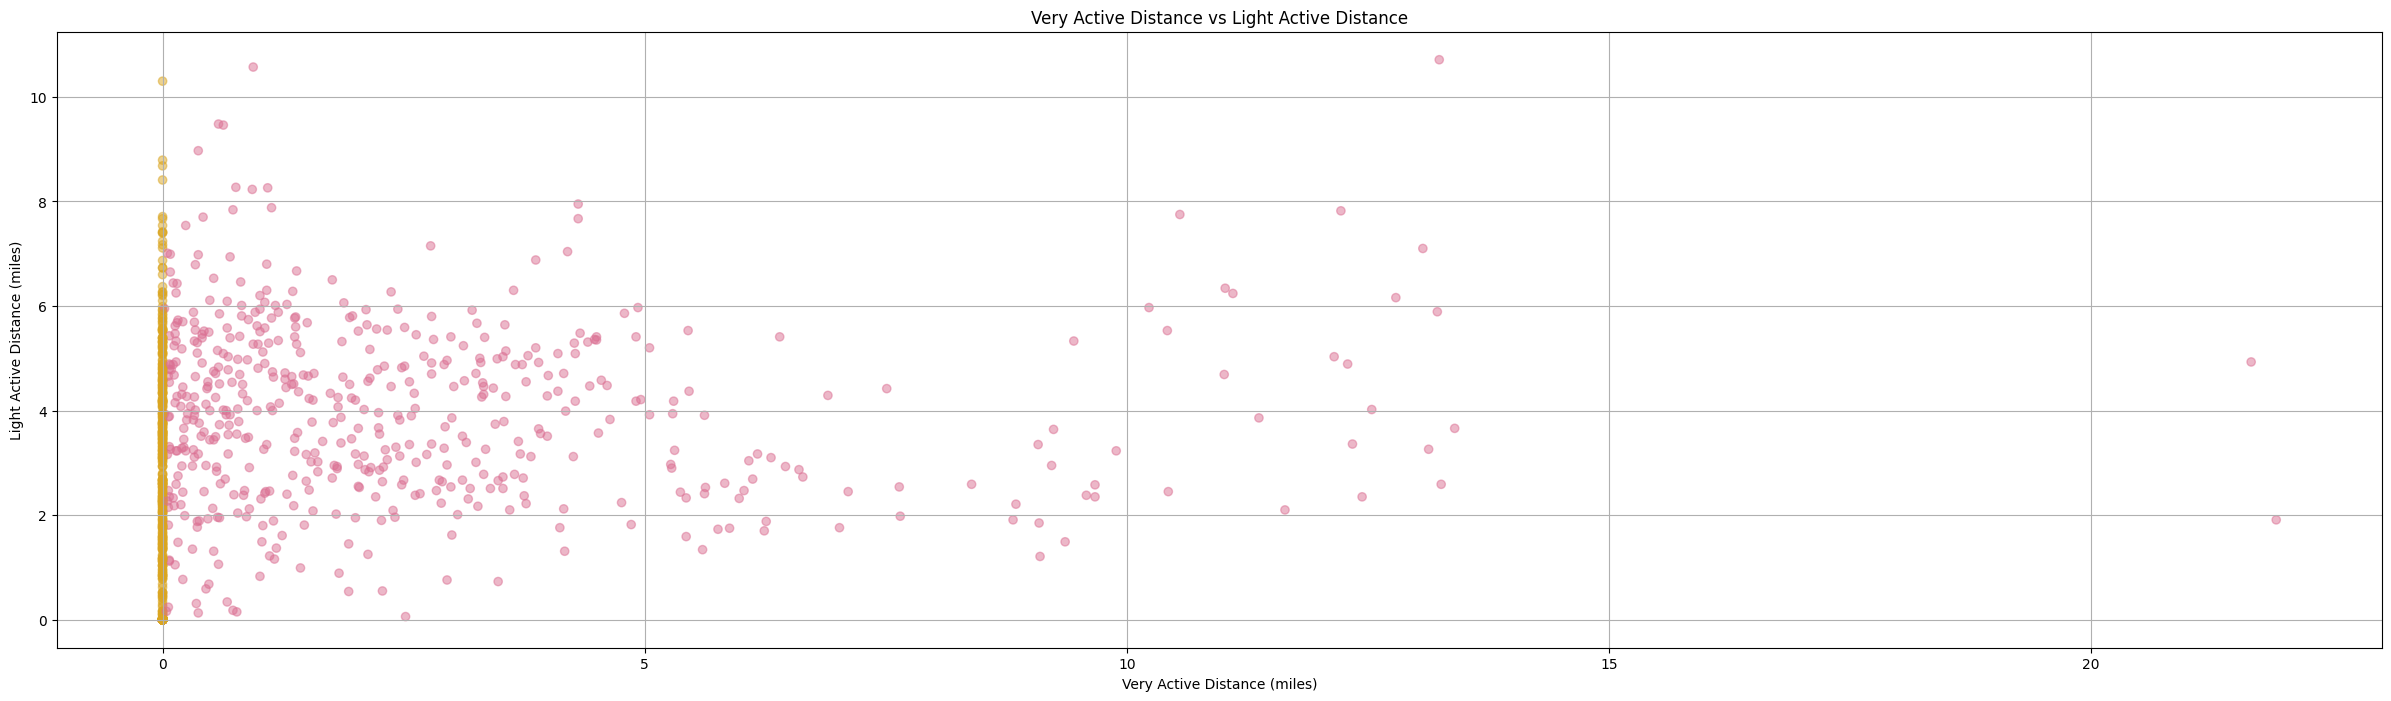

In [ ]:
# Scatter plot for very active day vs lightly active day
plt.figure(figsize=(30, 8))
colors = ['palevioletred' if active else 'goldenrod' for active in merged_daily_data['VeryActiveDistance']]
plt.scatter(merged_daily_data['VeryActiveDistance'], merged_daily_data['LightActiveDistance'], color=colors, alpha=0.5)
plt.title('Very Active Distance vs Light Active Distance')
plt.xlabel('Very Active Distance (miles)')
plt.ylabel('Light Active Distance (miles)')
plt.grid(True)
plt.show()

**Minutes active per day**

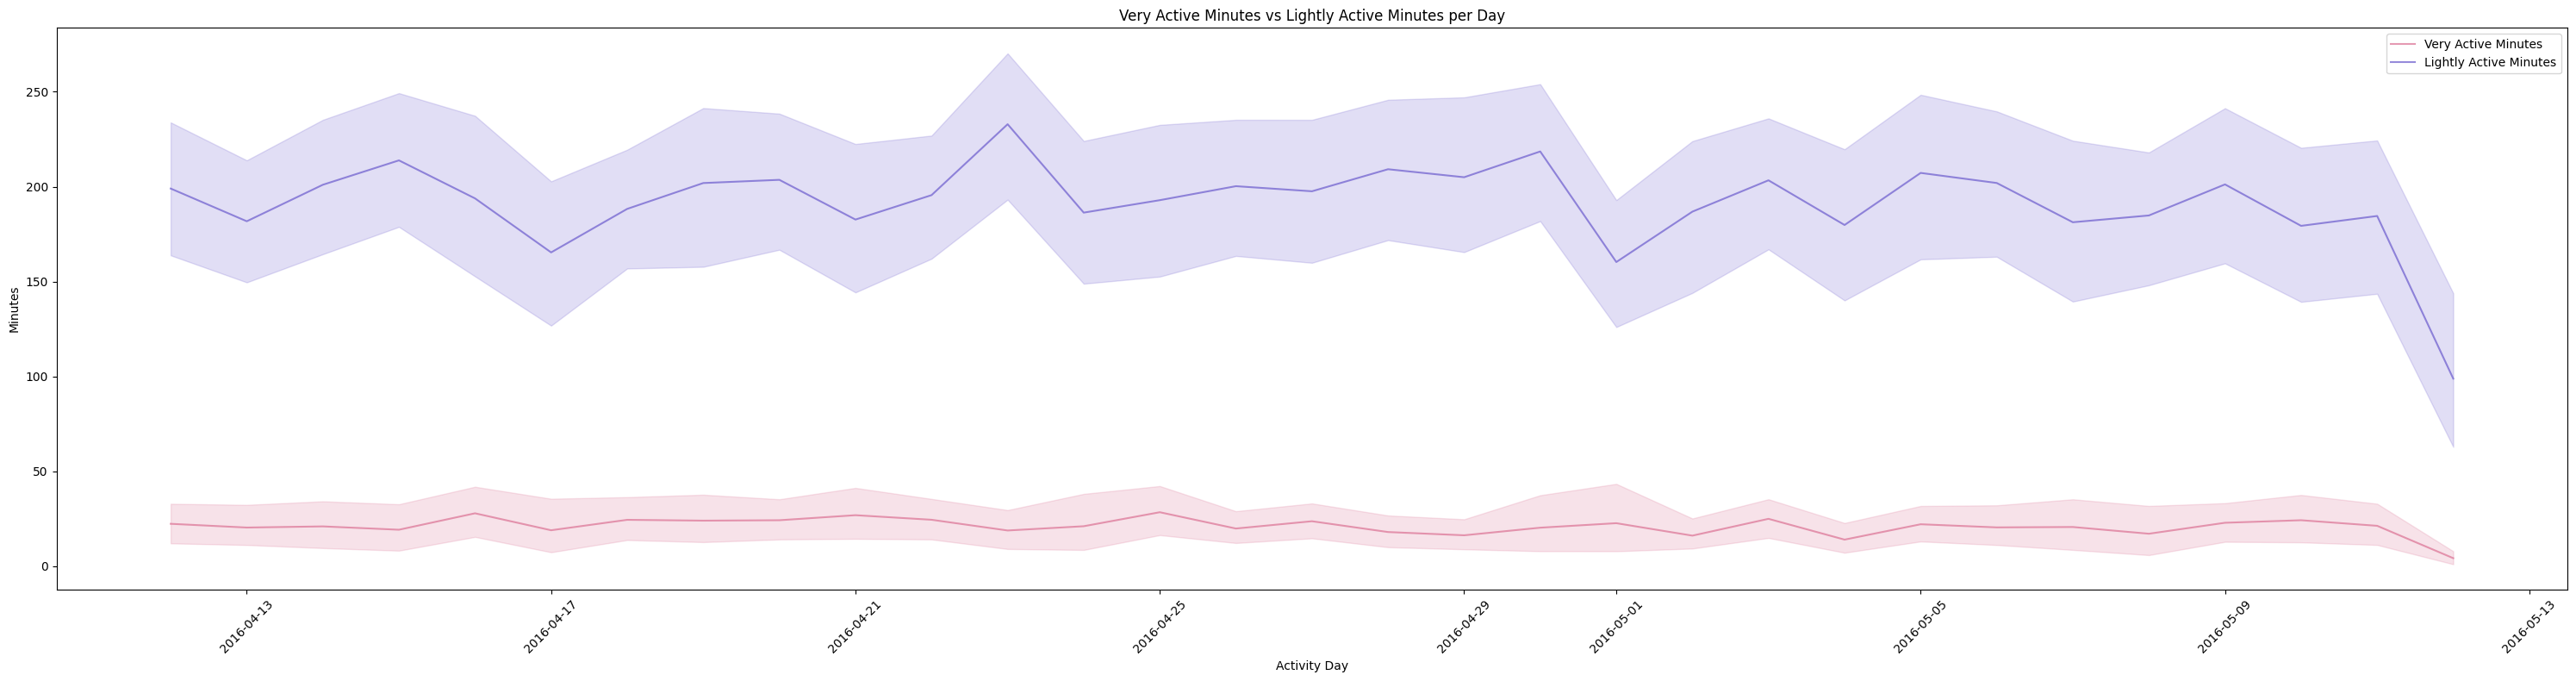

In [ ]:
# Assuming Merged_daily_data has a datetime column 'ActivityDay'
merged_daily_data['ActivityDay'] = pd.to_datetime(merged_daily_data['ActivityDay'])

# Set the figure size
plt.figure(figsize=(30, 8))

# Use Seaborn for a line chart
sns.lineplot(x='ActivityDay', y='VeryActiveMinutes', data=merged_daily_data, color='palevioletred', label='Very Active Minutes', alpha=0.7)
sns.lineplot(x='ActivityDay', y='LightlyActiveMinutes', data=merged_daily_data, color='slateblue', label='Lightly Active Minutes', alpha=0.7)

# Adding labels and title
plt.title('Very Active Minutes vs Lightly Active Minutes per Day')
plt.xlabel('Activity Day')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


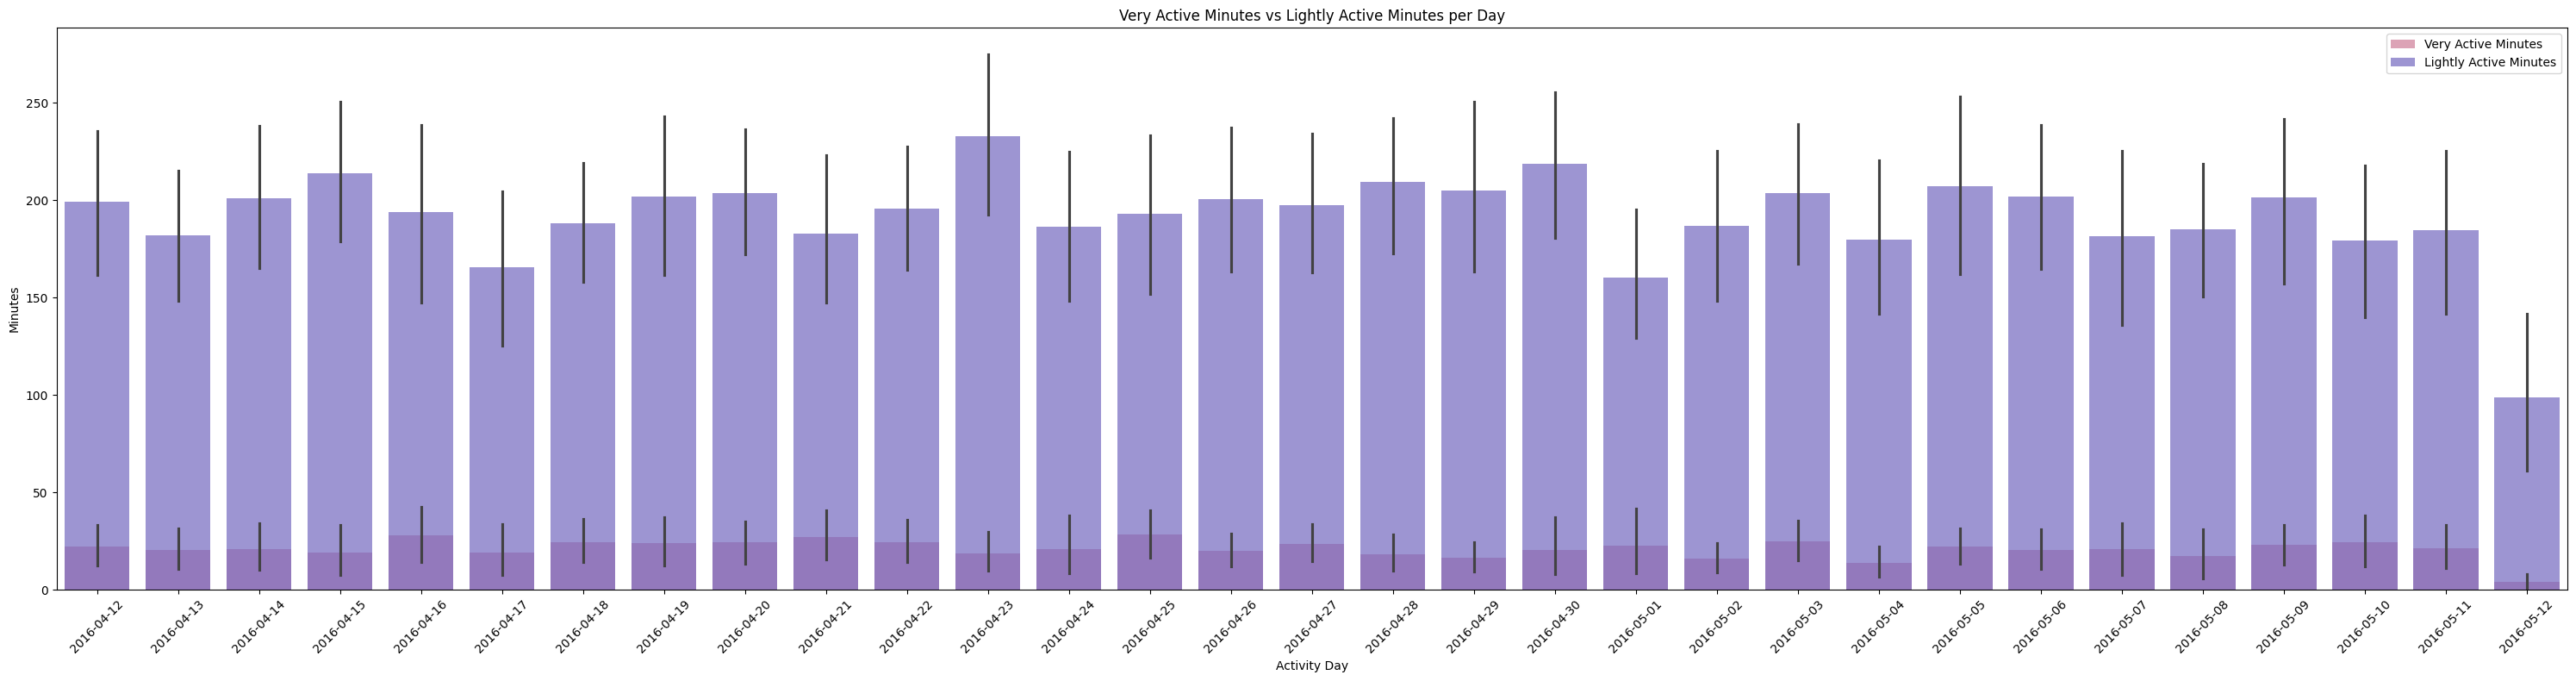

In [ ]:
# Assuming Merged_daily_data has a datetime column 'ActivityDay'
merged_daily_data['ActivityDay'] = pd.to_datetime(merged_daily_data['ActivityDay'])

# Set the figure size
plt.figure(figsize=(30, 8))

# Use Seaborn for a grouped bar chart
sns.barplot(x='ActivityDay', y='VeryActiveMinutes', data=merged_daily_data, color='palevioletred', label='Very Active Minutes', alpha=0.7)
sns.barplot(x='ActivityDay', y='LightlyActiveMinutes', data=merged_daily_data, color='slateblue', label='Lightly Active Minutes', alpha=0.7)

# Adding labels and title
plt.title('Very Active Minutes vs Lightly Active Minutes per Day')
plt.xlabel('Activity Day')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#Hourly fitness measure visualisation

In [ ]:
print(merged_hourly_data.head())

           Id           ActivityHour  Calories  TotalIntensity  \
0  1503960366  4/12/2016 12:00:00 AM        81              20   
1  1503960366   4/12/2016 1:00:00 AM        61               8   
2  1503960366   4/12/2016 2:00:00 AM        59               7   
3  1503960366   4/12/2016 3:00:00 AM        47               0   
4  1503960366   4/12/2016 4:00:00 AM        48               0   

   AverageIntensity  StepTotal  
0          0.333333        373  
1          0.133333        160  
2          0.116667        151  
3          0.000000          0  
4          0.000000          0  


Calories per time of the day

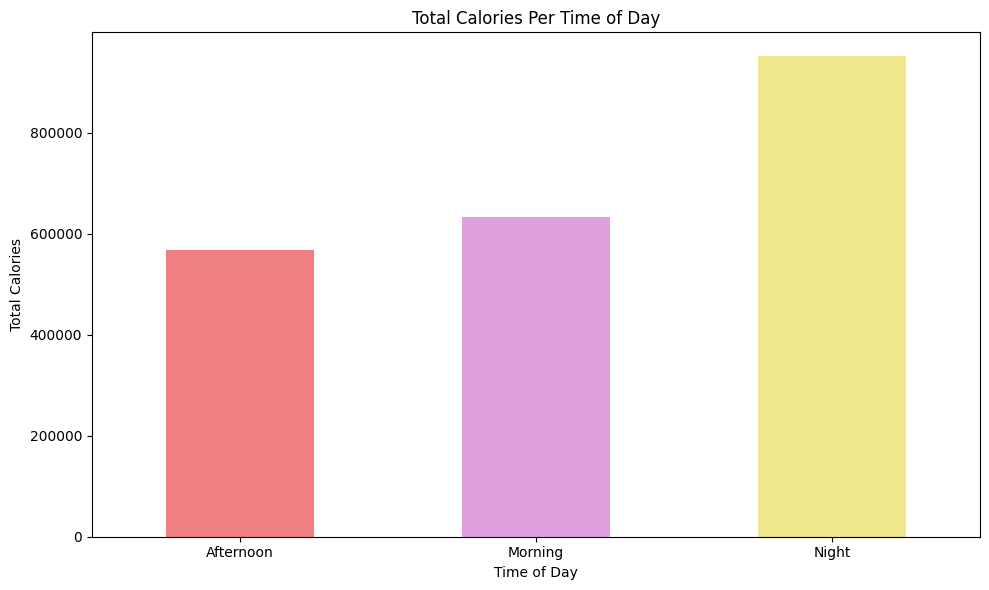

In [ ]:
merged_hourly_data['ActivityHour'] = pd.to_datetime(merged_hourly_data['ActivityHour'])
# Define time intervals for morning, afternoon, and night
morning_interval = (merged_hourly_data['ActivityHour'].dt.hour >= 6) & (merged_hourly_data['ActivityHour'].dt.hour < 12)
afternoon_interval = (merged_hourly_data['ActivityHour'].dt.hour >= 12) & (merged_hourly_data['ActivityHour'].dt.hour < 18)
night_interval = (merged_hourly_data['ActivityHour'].dt.hour >= 18) | (merged_hourly_data['ActivityHour'].dt.hour < 6)

# Create new columns to represent time intervals
merged_hourly_data['TimeOfDay'] = np.select([morning_interval, afternoon_interval,  night_interval],
                                            ['Morning', 'Afternoon', 'Night'], default='Unknown')

# Group by 'TimeOfDay' and calculate total calories for each time interval
calories_per_time_of_day = merged_hourly_data.groupby('TimeOfDay')['Calories'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
calories_per_time_of_day.plot(kind='bar', color=['lightcoral', 'plum', 'khaki'])
plt.xlabel('Time of Day')
plt.ylabel('Total Calories')
plt.title('Total Calories Per Time of Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


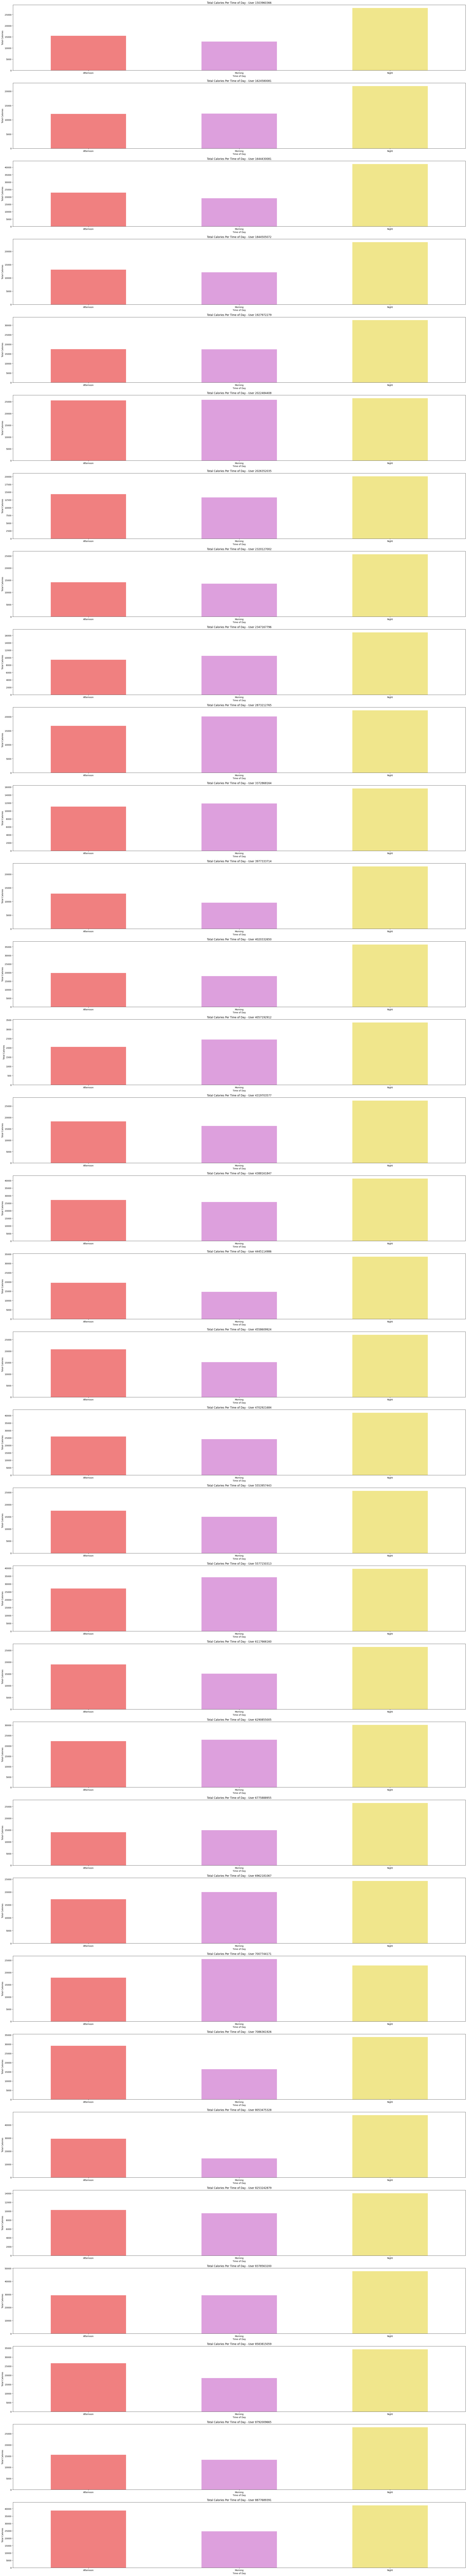

In [ ]:
# Calories Per Day Intervals for each user .
# Group by 'TimeOfDay' and 'Id' and calculate total calories for each time interval and each user
calories_per_time_of_day_user = merged_hourly_data.groupby(['Id', 'TimeOfDay'])['Calories'].sum().unstack()

# Plotting the bar graph for each user
fig, axes = plt.subplots(nrows=len(calories_per_time_of_day_user), figsize=(30, 5 * len(calories_per_time_of_day_user)))

for i, (user_id, calories_per_user) in enumerate(calories_per_time_of_day_user.iterrows()):
    calories_per_user.plot(kind='bar', ax=axes[i], color=['lightcoral', 'plum', 'khaki'])
    axes[i].set_xlabel('Time of Day')
    axes[i].set_ylabel('Total Calories')
    axes[i].set_title(f'Total Calories Per Time of Day - User {user_id}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Steps per time of the day

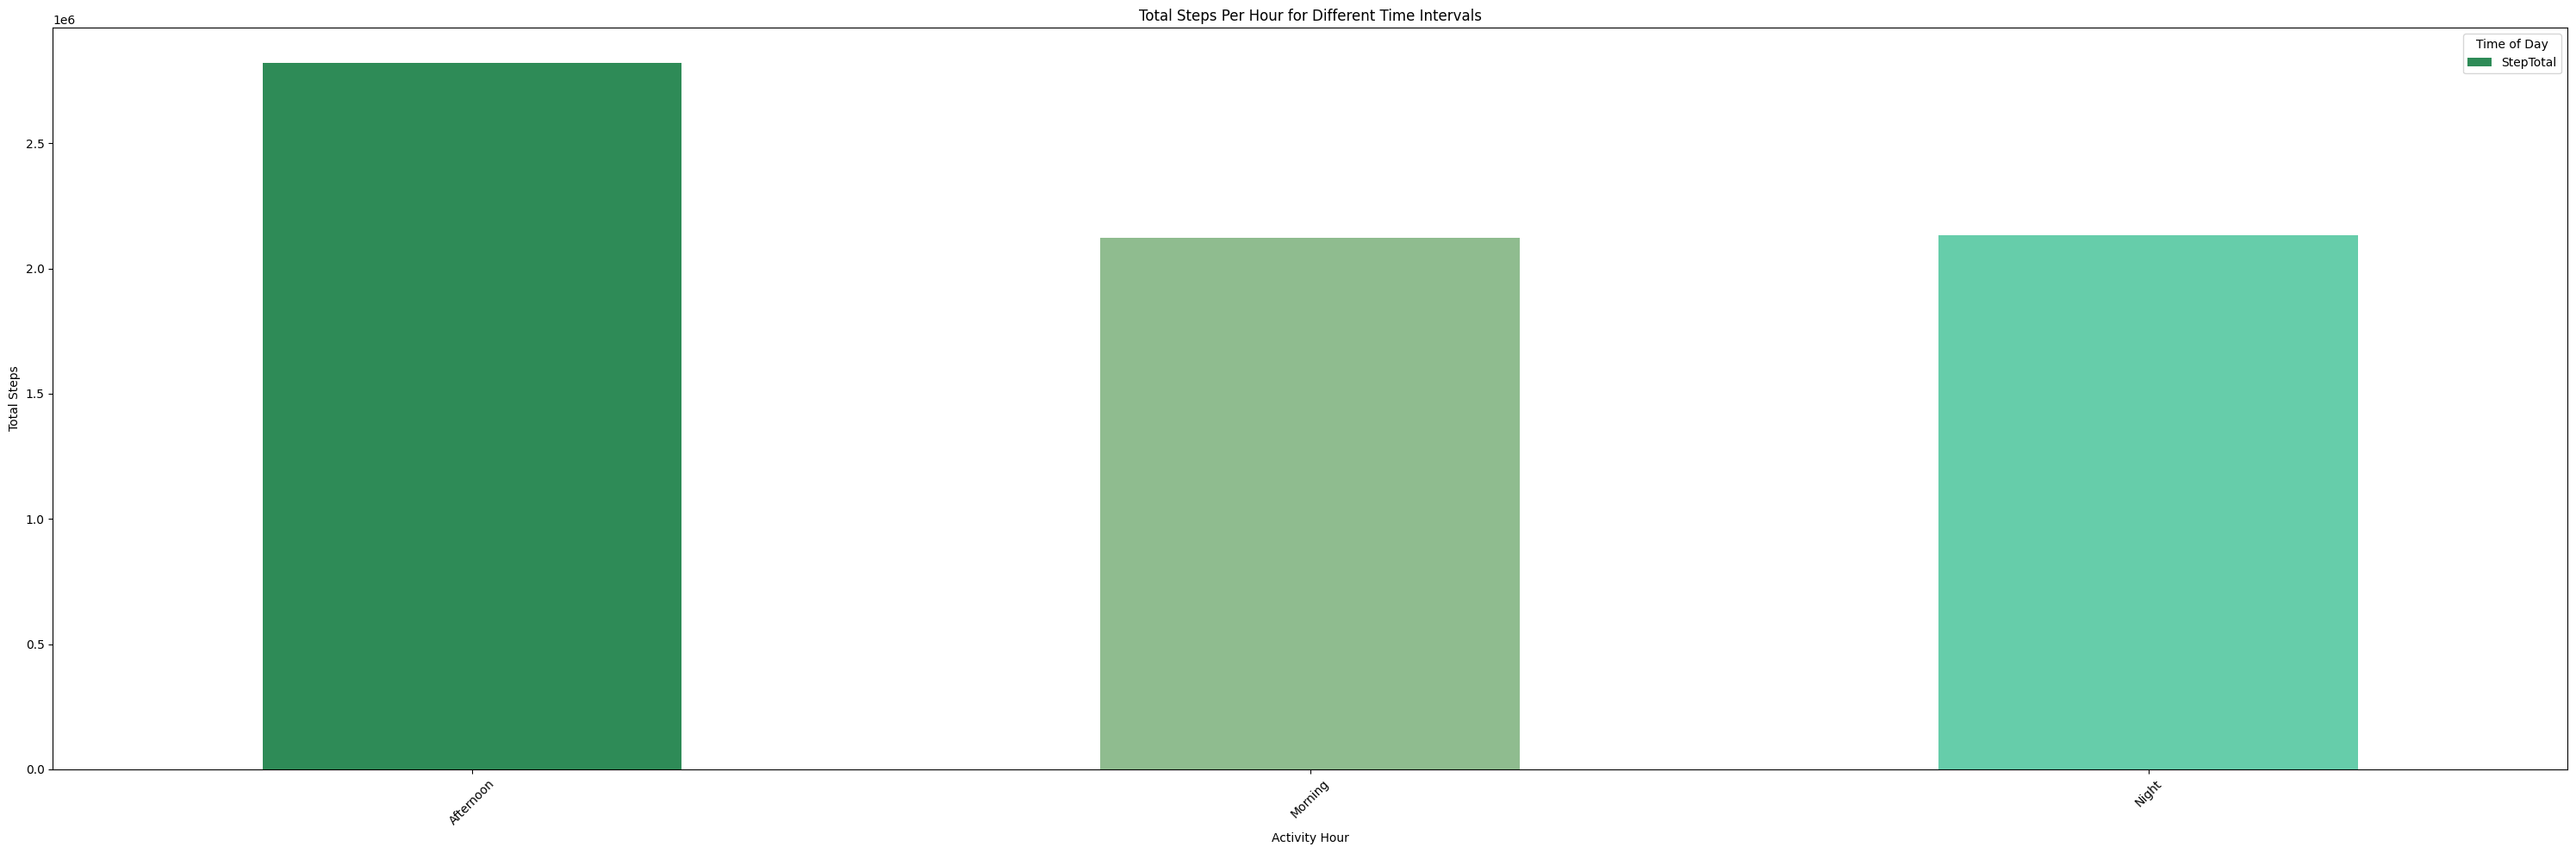

In [ ]:
# Create new columns to represent time intervals
merged_hourly_data['TimeOfDay'] = np.select([morning_interval, afternoon_interval, night_interval],
                                            ['Morning', 'Afternoon', 'Night'], default='Unknown')

# Group by 'TimeOfDay' and calculate total steps for each time interval
steps_per_time_of_day = merged_hourly_data.groupby('TimeOfDay')['StepTotal'].sum()

# Plotting the bar chart
plt.figure(figsize=(30, 10))
steps_per_time_of_day.plot(kind='bar', color=['seagreen', 'darkseagreen', 'mediumaquamarine'])
plt.xlabel('Activity Hour')
plt.ylabel('Total Steps')
plt.title('Total Steps Per Hour for Different Time Intervals')
plt.legend(title='Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

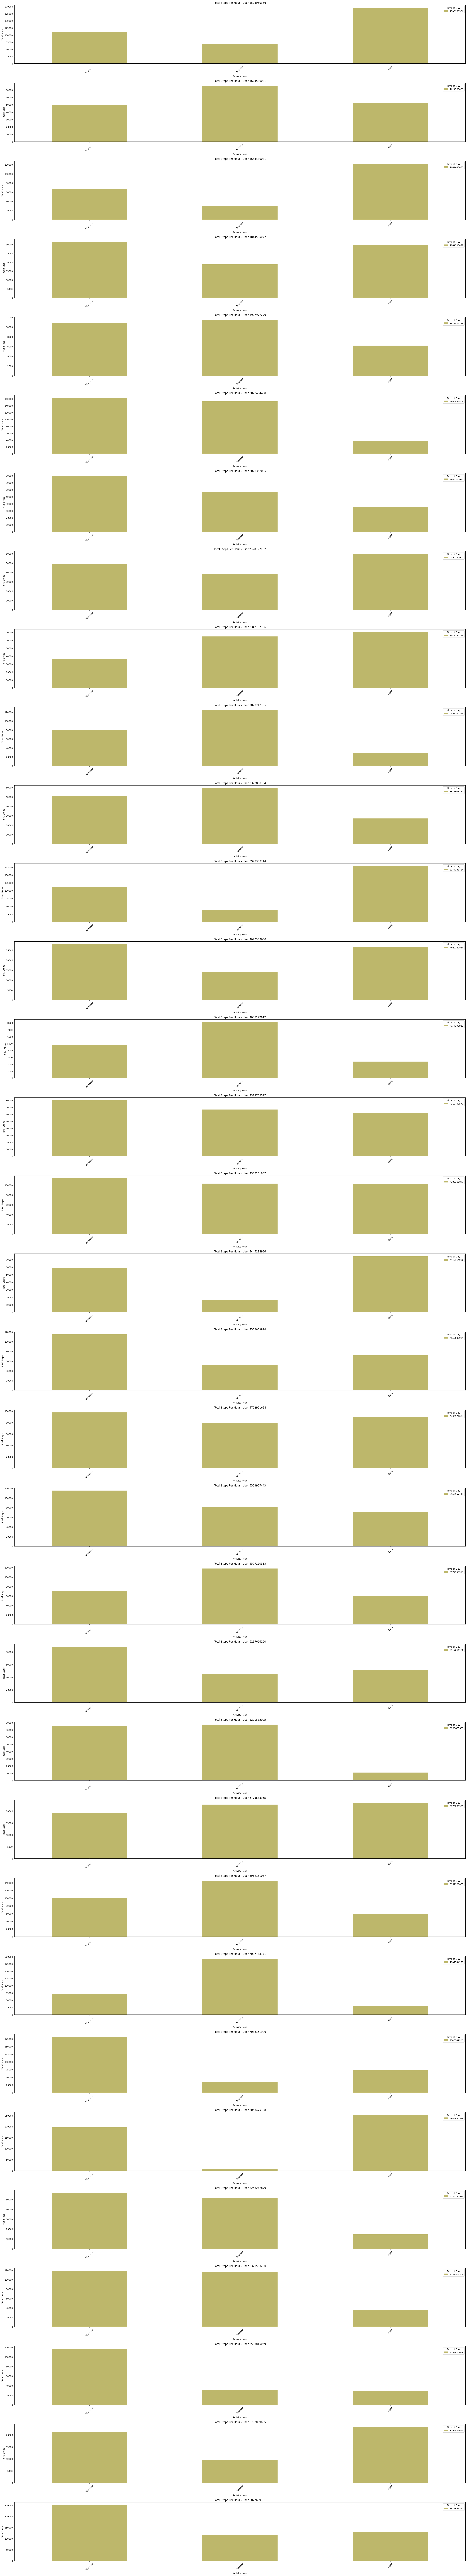

In [ ]:
# Total Steps Per Day Intervals for each user
# Group by 'TimeOfDay' and 'Id' and calculate total steps for each time interval and each user
steps_per_time_of_day_user = merged_hourly_data.groupby(['Id', 'TimeOfDay'])['StepTotal'].sum().unstack()

# Plotting the line chart for each user
fig, axes = plt.subplots(nrows=len(steps_per_time_of_day_user), figsize=(30, 5 * len(steps_per_time_of_day_user)))

for i, (user_id, steps_per_user) in enumerate(steps_per_time_of_day_user.iterrows()):
    steps_per_user.plot(kind='line', ax=axes[i], color=['darkkhaki'])
    axes[i].set_xlabel('Activity Hour')
    axes[i].set_ylabel('Total Steps')
    axes[i].set_title(f'Total Steps Per Hour - User {user_id}')
    axes[i].legend(title='Time of Day')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Sleeping Measures Visualisation

Hours of sleep vs number of steps

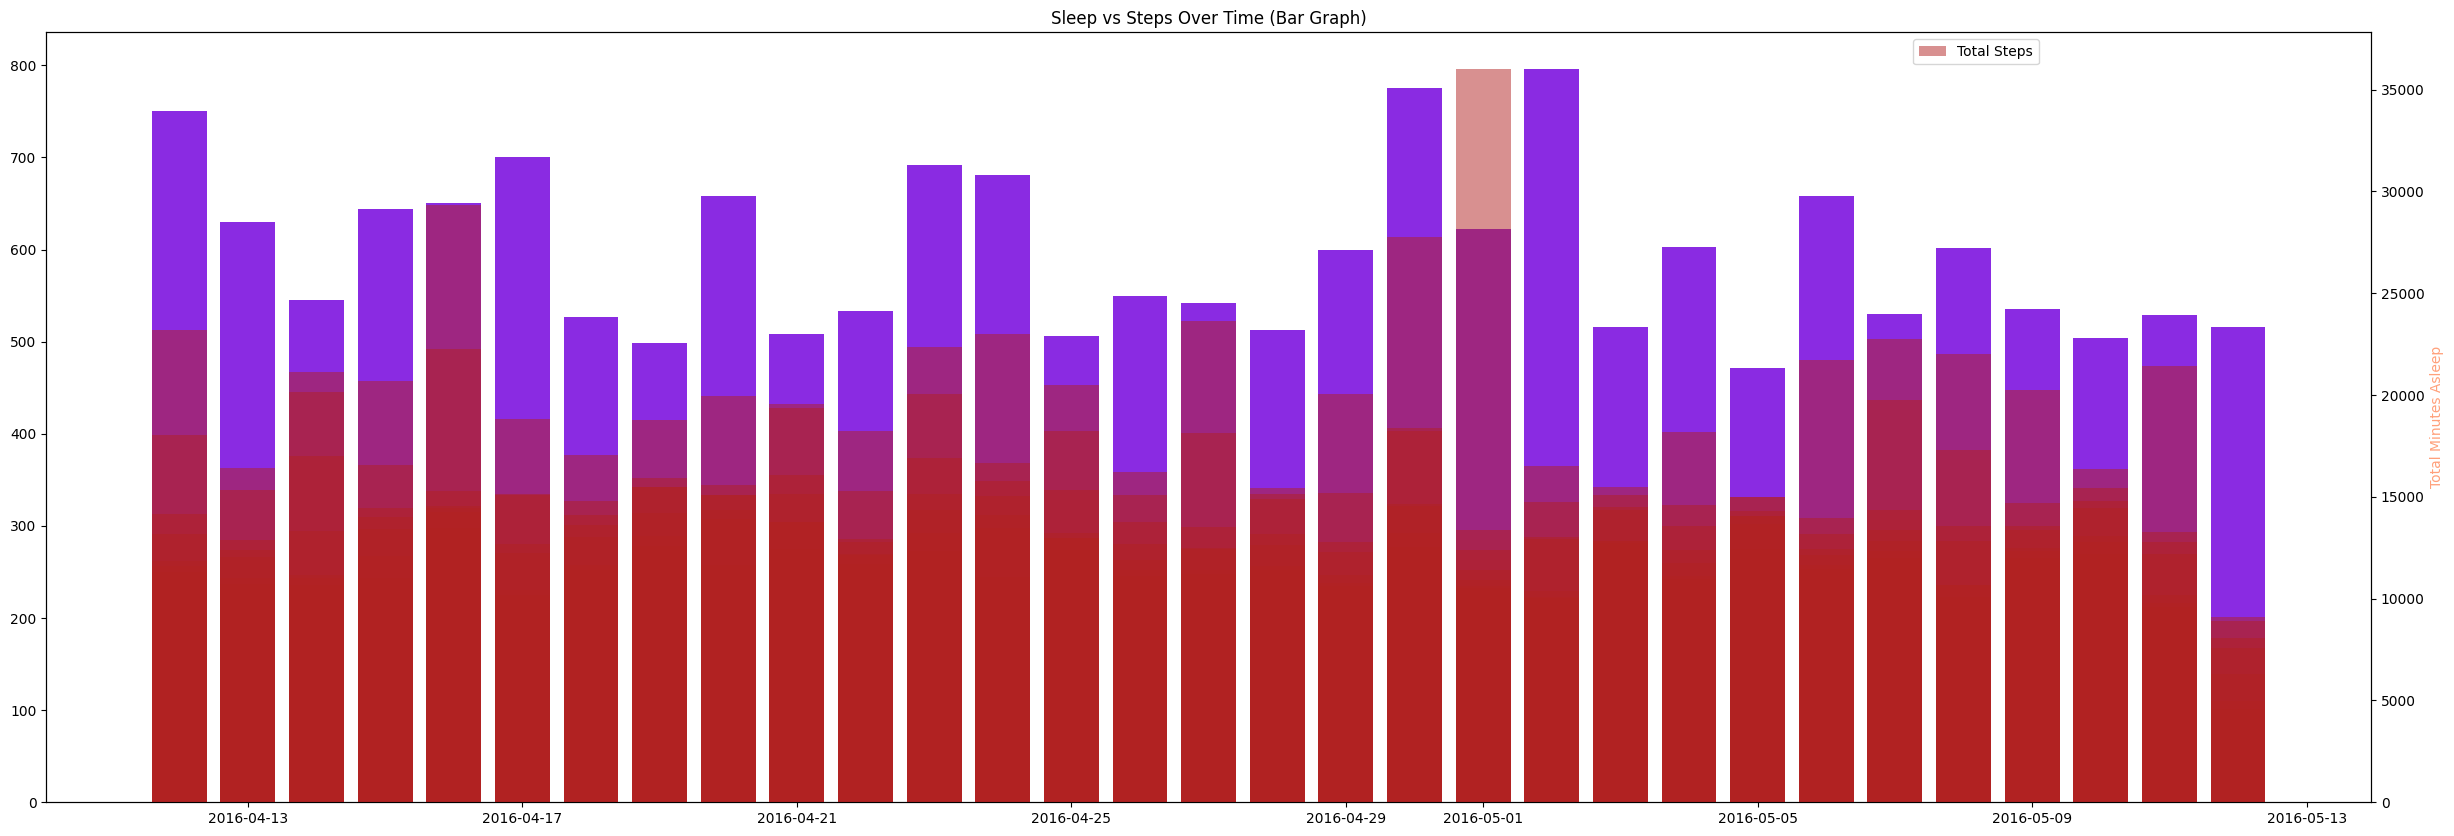

In [ ]:
# Convert 'SleepDay' to datetime format for sleep data
sleepday_merged['SleepDay'] = pd.to_datetime(sleepday_merged['SleepDay'])

# Convert 'ActivityDay' to datetime format for activity data
merged_daily_data['ActivityDay'] = pd.to_datetime(merged_daily_data['ActivityDay'])

# Set the figure size
plt.figure(figsize=(30, 10))

# Plot TotalMinutesAsleep
plt.bar(sleepday_merged['SleepDay'], sleepday_merged['TotalMinutesAsleep'], color='blueviolet', label='Total Minutes Asleep')

# Create a secondary y-axis for TotalSteps
plt.twinx()
plt.bar(merged_daily_data['ActivityDay'], merged_daily_data['TotalSteps'], color='firebrick', label='Total Steps', alpha=0.5)

# Set labels and title
plt.title('Sleep vs Steps Over Time (Bar Graph)')
plt.xlabel('Date')
plt.ylabel('Total Minutes Asleep', color='lightsalmon')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.show()

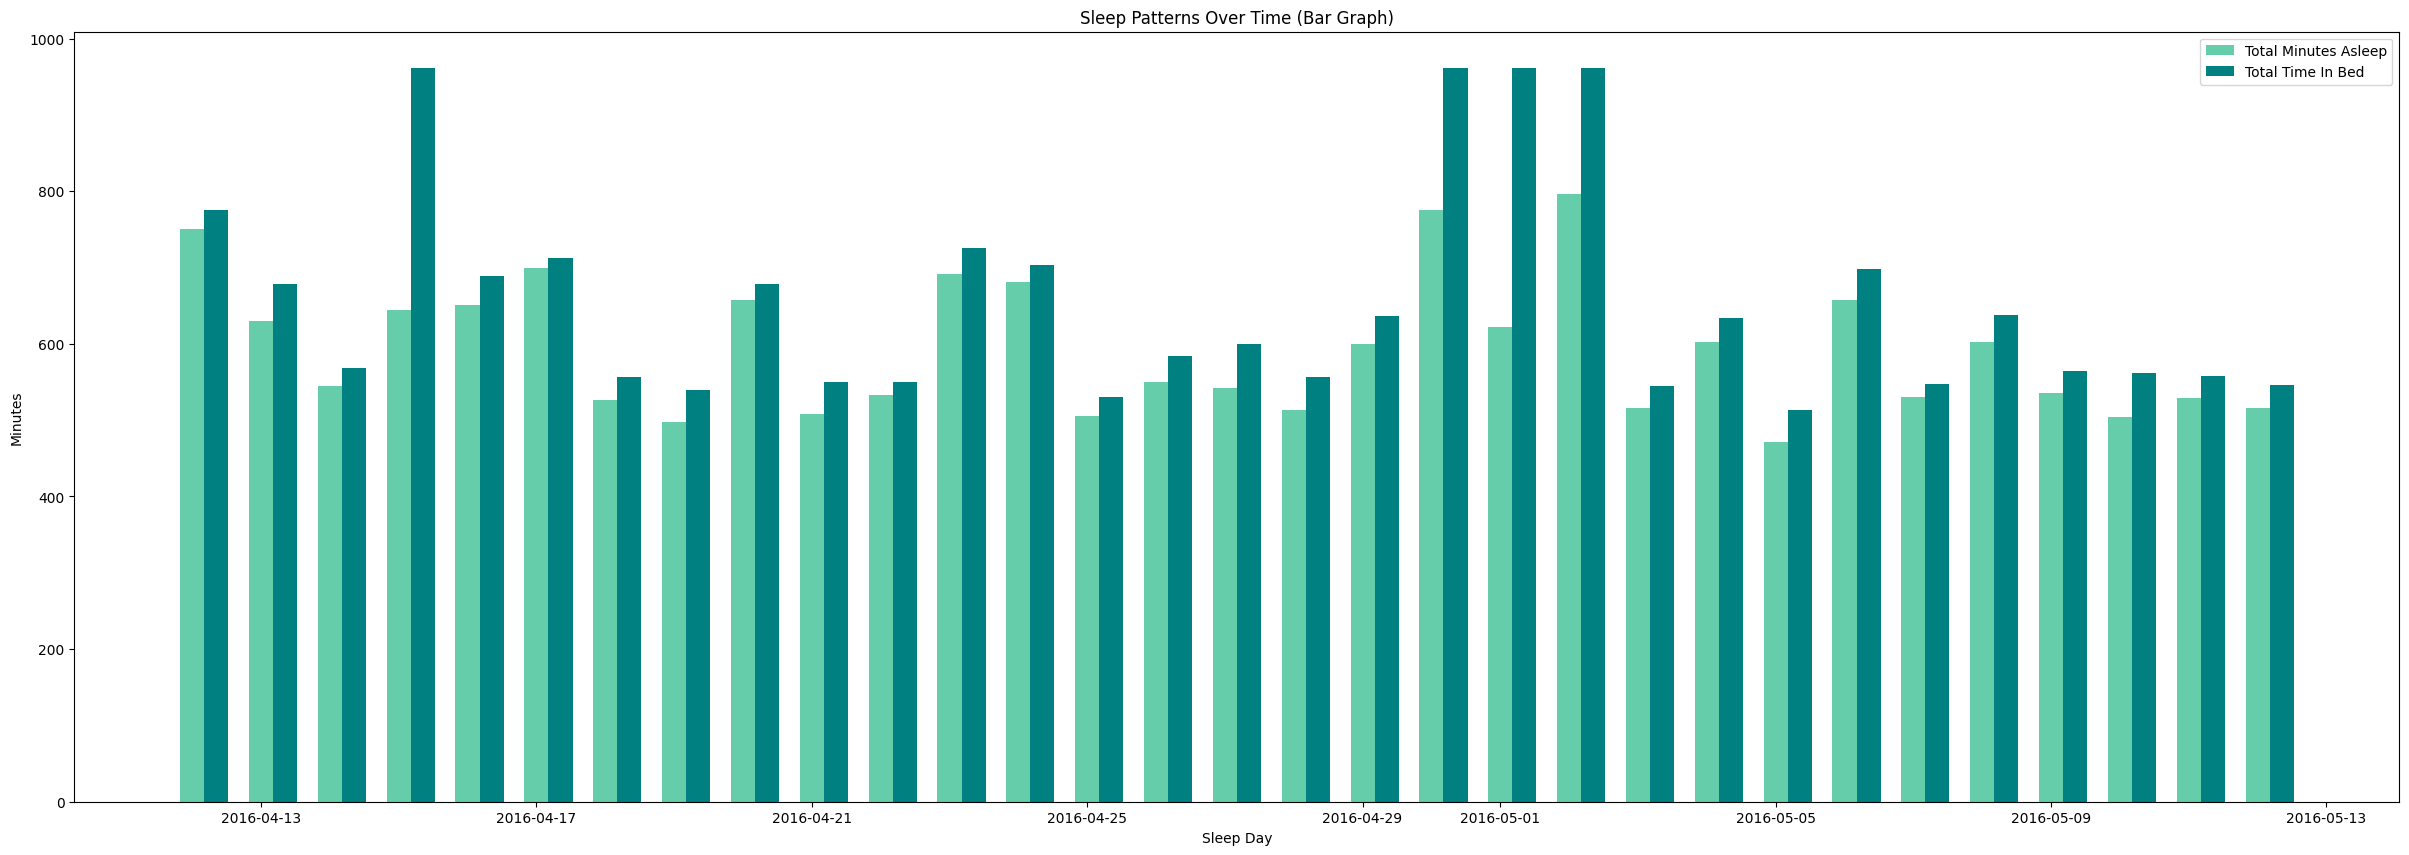

In [ ]:
# Convert 'SleepDay' to datetime format
sleepday_merged['SleepDay'] = pd.to_datetime(sleepday_merged['SleepDay'])

# Plotting TotalMinutesAsleep and TotalTimeInBed as a bar graph
plt.figure(figsize=(30,10))

# Bar width can be adjusted based on your preference
bar_width = 0.35

# Bar positions
bar_positions1 = sleepday_merged['SleepDay']
bar_positions2 = bar_positions1 + pd.Timedelta(days=bar_width)

# Bar heights
plt.bar(bar_positions1, sleepday_merged['TotalMinutesAsleep'], width=bar_width, label='Total Minutes Asleep', color='mediumaquamarine')
plt.bar(bar_positions2, sleepday_merged['TotalTimeInBed'], width=bar_width, label='Total Time In Bed', color='teal')

plt.title('Sleep Patterns Over Time (Bar Graph)')
plt.xlabel('Sleep Day')
plt.ylabel('Minutes')
plt.legend()
plt.show()

Sleep Patterns Over Time

In [ ]:
# Convert 'SleepDay' to datetime format
sleepday_merged['SleepDay'] = pd.to_datetime(sleepday_merged['SleepDay'])

# Plotting TotalMinutesAsleep and TotalTimeInBed as a bar graph
plt.figure(figsize=(30,10))

# Bar width can be adjusted based on your preference
bar_width = 0.35

# Bar positions
bar_positions1 = sleepday_merged['SleepDay']
bar_positions2 = bar_positions1 + pd.Timedelta(days=bar_width)

# Bar heights
plt.bar(bar_positions1, sleepday_merged['TotalMinutesAsleep'], width=bar_width, label='Total Minutes Asleep')
plt.bar(bar_positions2, sleepday_merged['TotalTimeInBed'], width=bar_width, label='Total Time In Bed')

plt.title('Sleep Patterns Over Time (Bar Graph)')
plt.xlabel('Sleep Day')
plt.ylabel('Minutes')
plt.legend()
plt.show()

#Minute Fitness Measure Visualisaton

In [ ]:
print(minute_merged_data)

               Id         ActivityMinute  Calories  Intensity
0      1503960366  4/12/2016 12:00:00 AM  0.786500        0.0
1      1503960366  4/12/2016 12:01:00 AM  0.786500        0.0
2      1503960366  4/12/2016 12:02:00 AM  0.786500        0.0
3      1503960366  4/12/2016 12:03:00 AM  0.786500        0.0
4      1503960366  4/12/2016 12:04:00 AM  0.786500        0.0
...           ...                    ...       ...        ...
59859  1624580081   4/23/2016 4:38:00 PM  1.306707        0.0
59860  1624580081   4/23/2016 4:39:00 PM  1.306707        0.0
59861  1624580081   4/23/2016 4:40:00 PM  1.306707        1.0
59862  1624580081   4/23/2016 4:41:00 PM  1.306707        1.0
59863  1624580081   4/23/2016 4:42:00 PM  1.306707        1.0

[59864 rows x 4 columns]


HOURLY CALORIFIC DATA

In [ ]:
# Convert 'ActivityMinute' to datetime format
merged_minute_data['ActivityMinute'] = pd.to_datetime(merged_minute_data['ActivityMinute'], errors='coerce')

# Drop rows with NaT values in 'ActivityMinute'
merged_minute_data = merged_minute_data.dropna(subset=['ActivityMinute'])

# Extract the hour part of the timestamp
merged_minute_data['Hour'] = merged_minute_data['ActivityMinute'].dt.hour

# Group by 'Id' and 'Hour', then calculate the mean of 'Calories' and 'Intensity'
result = merged_minute_data.groupby(['Id', 'Hour']).agg({'Calories': 'mean', 'Intensity': 'mean'}).reset_index()

# Display the resulting DataFrame
print(result)

            Id  Hour  Calories  Intensity
0   1503960366     0  1.021053   0.123333
1   1503960366     1  0.912244   0.058333
2   1503960366     2  0.850996   0.029444
3   1503960366     3  0.827523   0.015556
4   1503960366     4  0.812670   0.005556
5   1503960366     5  0.809897   0.002778
6   1503960366     6  0.831083   0.016667
7   1503960366     7  0.868244   0.043333
8   1503960366     8  1.043226   0.151667
9   1503960366     9  1.729140   0.378333
10  1503960366    10  1.338528   0.270000
11  1503960366    11  1.329919   0.243333
12  1503960366    12  1.397867   0.304444
13  1503960366    13  1.471925   0.347222
14  1503960366    14  1.480835   0.387222
15  1503960366    15  1.305623   0.245000
16  1503960366    16  1.417150   0.321667
17  1503960366    17  1.509346   0.347222
18  1503960366    18  2.069380   0.746111
19  1503960366    19  1.743363   0.525000
20  1503960366    20  1.744123   0.531667
21  1503960366    21  1.952664   0.635057
22  1503960366    22  1.451488   0

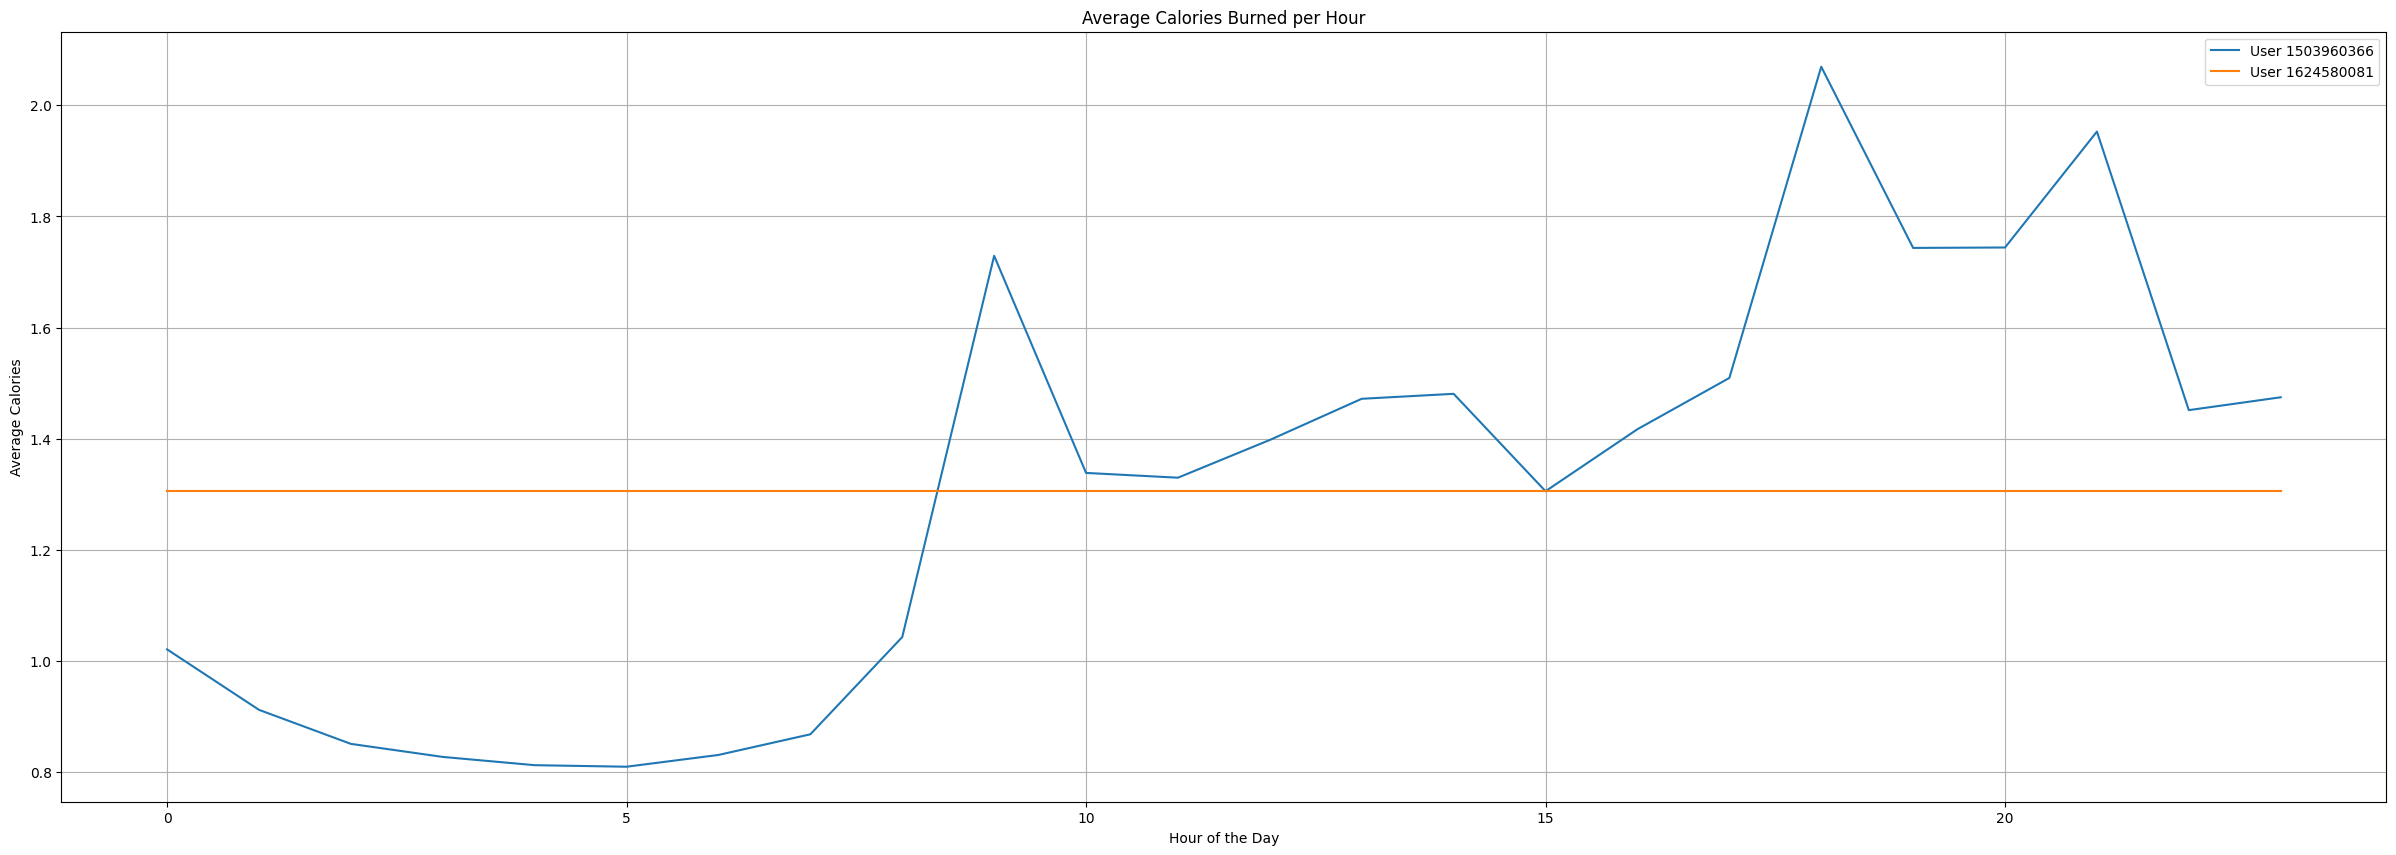

In [ ]:
# Plot the average calories burned per hour for each user
plt.figure(figsize=(30, 10))
for user_id, user_data in result.groupby('Id'):
    plt.plot(user_data['Hour'], user_data['Calories'], label=f'User {user_id}')

plt.title('Average Calories Burned per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.legend()
plt.grid(True)
plt.show()

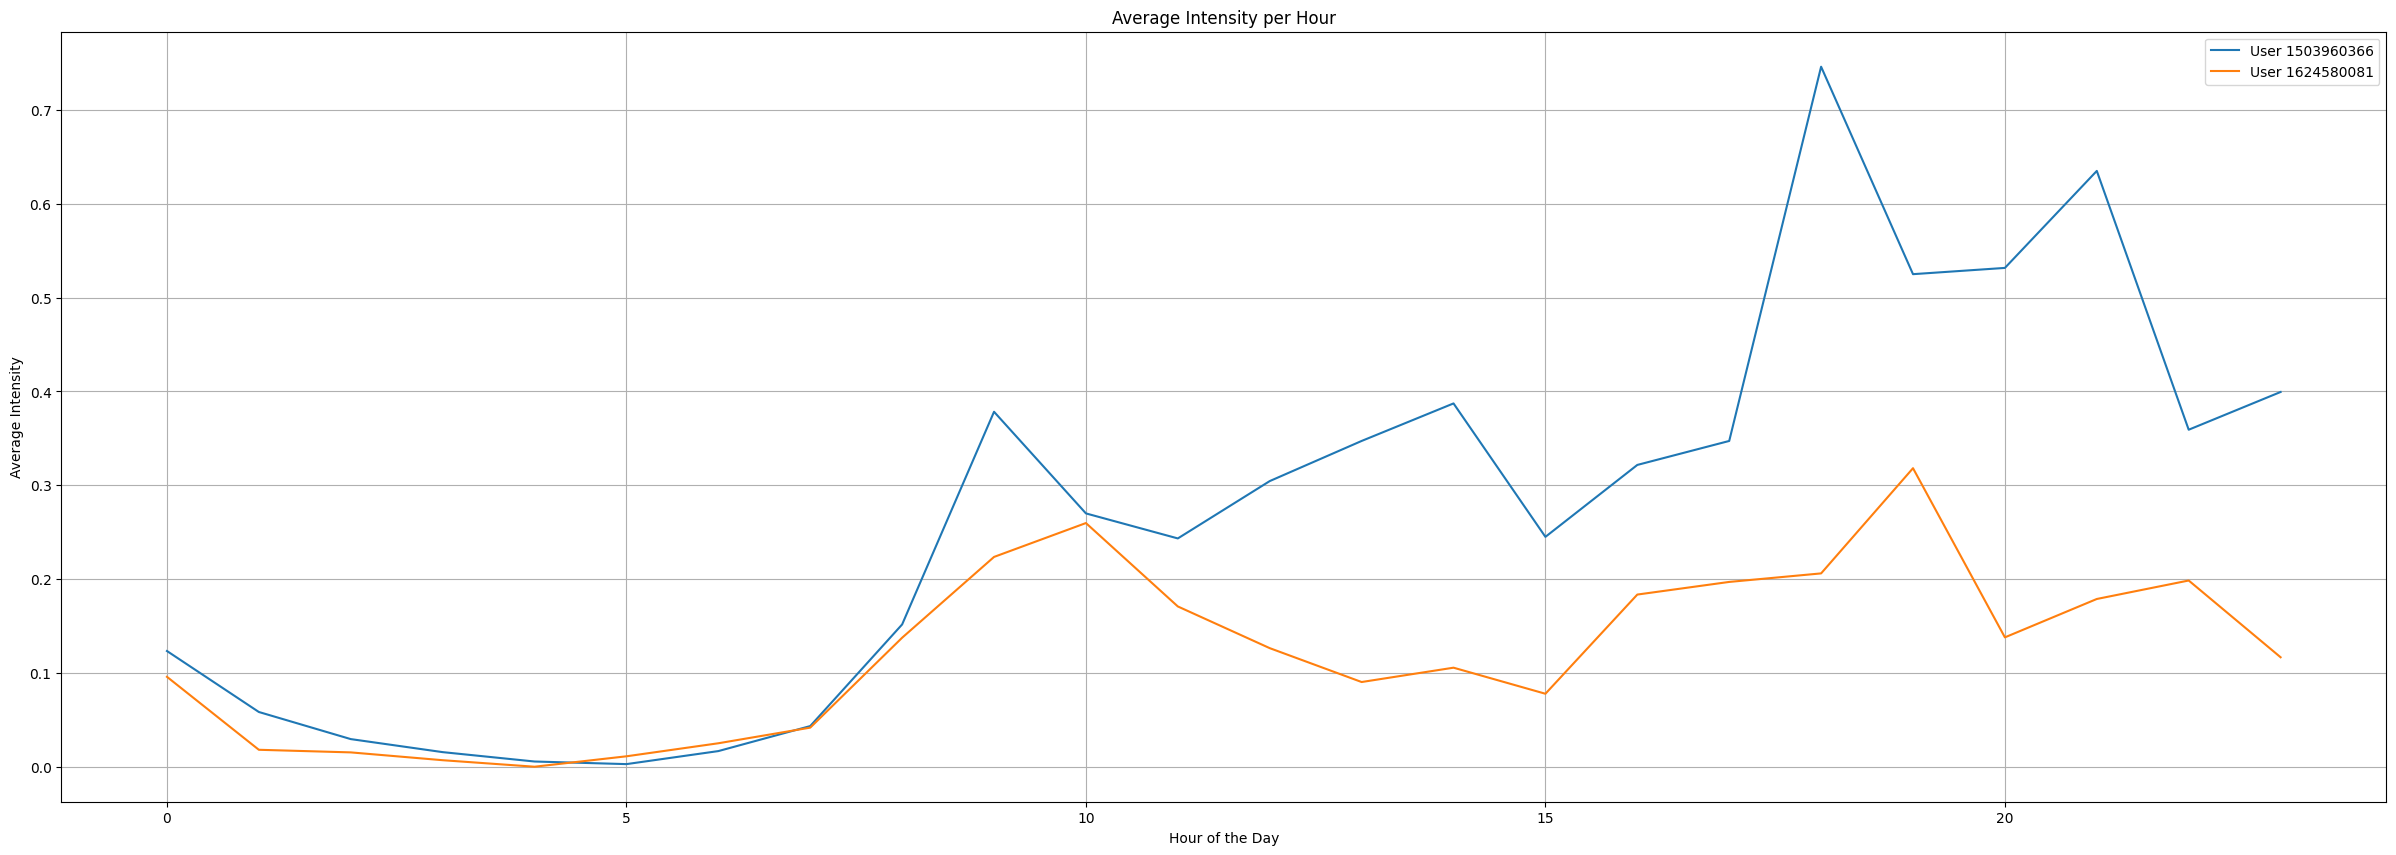

In [ ]:
# Plot the average intensity per hour for each user
plt.figure(figsize=(30, 10))
for user_id, user_data in result.groupby('Id'):
    plt.plot(user_data['Hour'], user_data['Intensity'], label=f'User {user_id}')

plt.title('Average Intensity per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Intensity')
plt.legend()
plt.grid(True)
plt.show()

Activity Variations:

Across the observed timeframe, users displayed diverse patterns in their daily step count, total distance covered, and active minutes. While some users consistently engaged in highly or moderately active pursuits, others exhibited more variability.

1. Hourly Fluctuations: Analysis of hourly data uncovered shifts in calorie expenditure and overall intensity for each user throughout the day. Distinct peak activity hours and identifiable periods of sedentary behavior contributed to a holistic comprehension of daily routines.

2. Minute-Level Intensity: Detailed insights into users' activity intensity were gleaned at the minute level, capturing fluctuations within specific time intervals. The analysis spotlighted instances of heightened or diminished intensity, contributing to a nuanced understanding of users' activity habits.

3. Significance and Future Prospects: The findings from this project offer valuable insights for crafting personalized health and fitness recommendations. Future studies could delve into exploring connections between activity patterns and external factors, such as sleep quality, dietary habits, or overall well-being.

# Marketing stratergies and reccomendations

1. **Gamification and Rewards:**
   - Implement challenges and milestones: Create challenges that encourage users to achieve specific fitness goals. For instance, completing 5000 steps daily for a week could unlock a special achievement or reward.
   - Virtual badges and trophies: Award users with virtual badges or trophies for reaching milestones. This not only motivates them but also provides a sense of accomplishment.

2. **Social Media Integration:**
   - Shareable achievements: Allow users to share their fitness achievements and rewards on social media platforms directly from the app. This can increase brand visibility and attract new users.
   - Community challenges: Foster a sense of community by organizing group challenges or competitions. Users can compete with friends or join larger community challenges, enhancing engagement.

3. **Personalized Recommendations:**
   - Personalized goals: Use data collected by wearables to provide users with personalized fitness goals. Tailoring recommendations based on individual performance can lead to a more satisfying user experience.
   - Customized rewards: Offer rewards that align with users' interests or preferences. For example, discounts on fitness gear, exclusive content, or partnerships with other health and wellness brands.

4. **In-app Engagement:**
   - Push notifications: Send encouraging messages, reminders, and updates to keep users engaged. Offering personalized tips or challenges can boost daily usage.
   - Educational content: Provide informative content within the app, such as articles, videos, or tutorials related to fitness and health. This positions the company as a valuable resource for users.

5. **Partnerships and Collaborations:**
   - Collaborate with fitness influencers: Partnering with influencers in the fitness industry can expand the reach of the brand. Influencers can share their experiences with the wearable and encourage their followers to join challenges.
   - Cross-promotions: Collaborate with other health and wellness brands for cross-promotional activities. This can introduce the wearable to new audiences and create mutually beneficial partnerships.

6. **Customer Loyalty Programs:**
   - Tiered rewards system: Create a loyalty program with different tiers, offering increasing benefits as users continue to engage with the wearable. This can foster long-term customer loyalty.
   - Exclusive access: Provide exclusive access to new features, beta testing, or special events as a reward for consistent usage.

7. **Feedback Mechanism:**
   - User feedback loop: Encourage users to provide feedback on the app and wearable experience. Actively listen to customer suggestions and implement improvements based on their input.
   - Testimonials and success stories: Showcase real-life success stories and testimonials from users who have experienced positive outcomes through the use of the wearable.

8. **Use of Artificial Intelligence (AI) and Augmented Reality (AR):**
   - Utilizing AI algorithms to analyze user data, including activity patterns, preferences, and health metrics. By understanding individual user behavior, the wearable can generate personalized recommendations for fitness goals, challenges, and activities. AI can dynamically adapt to users' evolving fitness levels and preferences, providing tailored suggestions for workout routines, nutrition plans, and recovery strategies. Similarily, incorporating AR features in the app that enhance the user experience. For example, users could virtually explore different terrains while walking or jogging, adding an element of excitement to their daily routine.


9. **Interactive Challenges:**
   - Introduce interactive challenges that not only focus on steps but also incorporate other fitness aspects like heart rate, sleep quality, or nutrition. Creating diverse challenges keeps users engaged and motivated to explore different facets of their well-being.

10. **Seasonal Campaigns:**
    - Launch seasonal campaigns or challenges tied to specific times of the year. For example, a "Summer Fitness Challenge" or a "Holiday Wellness Journey" can tap into users' motivation during different seasons.

By incorporating a mix of these strategies, a fitness tech wearable company can create a more dynamic, engaging, and rewarding experience for its users, ultimately forging brand loyalty and attracting new customers.   
